In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names_test =['id', 'comment_text']
df_test = pd.read_csv('test.csv',header=None,sep=",",names=names_test, encoding = "ISO-8859-1")

In [3]:
df_test = df_test.drop(['id'], axis=1)
df_test.drop(df_test.index[:1], inplace=True)

In [4]:
bad_words = []
negative_file = open("negative-words.txt", "r")
for line in negative_file:
    bad_words.append(line.strip("\n"))
negative_file.close()
profanity_file = open("profanity-words.txt", "r")
for line in profanity_file:
    if (line.strip("\n") not in bad_words):
        bad_words.append(line.strip("\n"))
profanity_file.close()
# print(bad_words)

In [5]:
data_test = df_test.values
X_test = []
for index in range(0, 15000):
    X_test.append(data_test[index][0])
cv = sklearn.feature_extraction.text.CountVectorizer(vocabulary=bad_words)
X_test_features = cv.fit_transform(X_test).toarray()

In [6]:
df_test_unsupervised = pd.DataFrame(X_test_features, columns=bad_words)
df_test_unsupervised.sum()

2-faced            0
2-faces            0
abnormal           2
abolish            0
abominable         0
abominably         0
abominate          0
abomination        2
abort              0
aborted            0
aborts             0
abrade             0
abrasive           1
abrupt             2
abruptly           1
abscond            0
absence           33
absent-minded      0
absentee           0
absurd            23
absurdity          4
absurdly           5
absurdness         0
abuse             67
abused             8
abuses             4
abusive           25
abysmal            0
abysmally          0
abyss              0
                ... 
titt               0
tittie5            0
tittiefucker       0
titties          626
tittyfuck          0
tittywank          0
titwank            0
tosser             1
turd               4
tw4t               0
twat              66
twathead           0
twatty             0
twunt              0
twunter            0
v14gra             0
v1gra        

In [7]:
sums = df_test_unsupervised.sum().tolist()
f = open("sums.csv", "w")
count = 0
for i in sums:
    f.write(bad_words[count] + "," + str(i) + "\n")
    count += 1
f.close()
count = 0
sums_not_zero = []
words_not_zero = []
for i in sums:
    if i > 0:
        sums_not_zero.append(i)
        words_not_zero.append(bad_words[count])
    count += 1
print(sums_not_zero)
print(words_not_zero)

[2, 2, 1, 2, 1, 33, 23, 4, 5, 67, 8, 4, 25, 2, 40, 46, 26, 8, 37, 1, 1, 1, 1, 2, 1, 2, 1, 1, 54, 1, 1, 5, 22, 2, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 20, 37, 3, 1, 1, 1, 8, 20, 2, 3, 15, 9, 2, 13, 31, 1, 3, 2, 5, 10, 38, 1, 8, 1, 1, 2, 3, 3, 1, 1, 3, 2, 1, 4, 3, 1, 1, 17, 1, 4, 10, 17, 1, 24, 3, 1, 4, 7, 20, 3, 1, 3, 3, 1, 166, 140, 1, 7, 2, 3, 1, 16, 3, 9, 3, 11, 1, 305, 26, 2, 2, 4, 1, 1, 1, 1, 4, 4, 11, 4, 2, 1, 10, 343, 22, 1, 1, 4, 2, 6, 12, 1, 1, 1, 1, 15, 2, 1, 1, 2, 2, 1, 9, 2, 105, 86, 4, 3, 5, 211, 2, 4, 4, 1, 1, 20, 1, 514, 34, 2, 1, 12, 1, 35, 11, 1, 2, 21, 1, 1, 2, 44, 28, 3, 4, 3, 3, 3, 3, 28, 2, 4, 19, 2, 1, 2, 1, 3, 35, 1, 26, 64, 30, 11, 5, 1, 5, 2, 1, 5, 83, 2, 20, 13, 2, 2, 2, 20, 33, 3, 1, 3, 5, 2, 1, 1, 16, 12, 1, 4, 3, 5, 153, 17, 14, 12, 3, 1, 1, 4, 3, 12, 1, 24, 12, 19, 5, 4, 1, 4, 10, 1, 16, 1, 1, 1, 1, 1, 1, 4, 2, 2, 4, 1, 6, 1, 6, 6, 3, 3, 1, 17, 1, 5, 5, 1, 6, 1, 2, 1, 22, 12, 1, 1, 9, 5, 1, 1, 1, 7, 2, 6, 5, 6, 1, 20, 10, 1, 1, 3, 2, 18, 9, 18, 1, 38, 14, 33, 1

c:\users\susanna xu\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


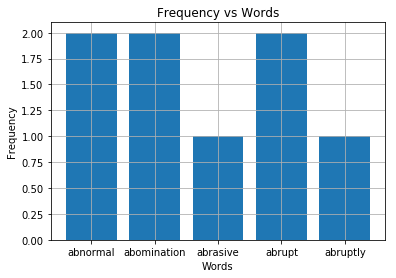

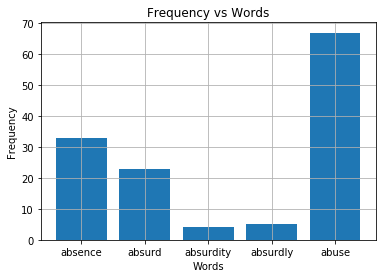

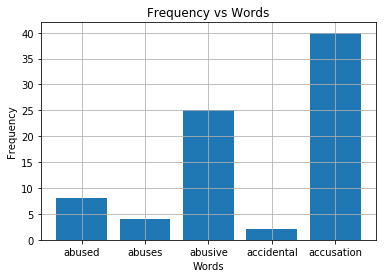

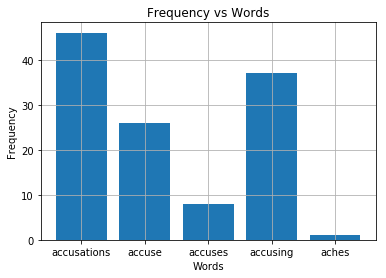

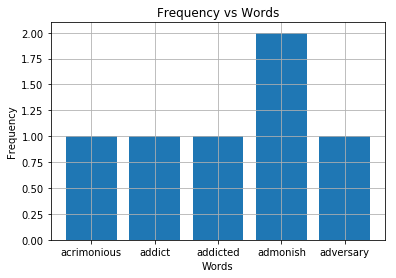

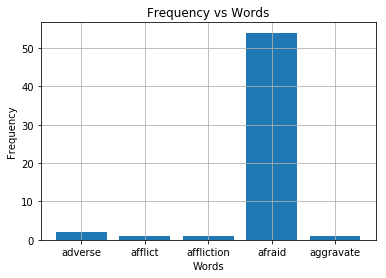

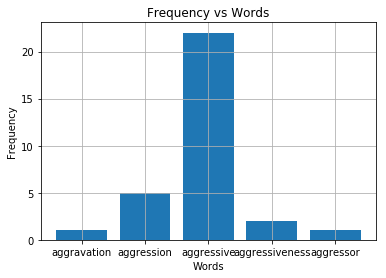

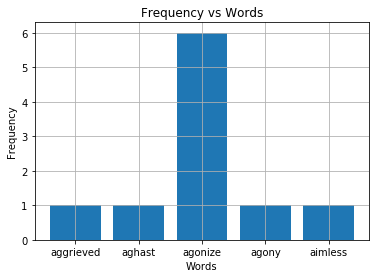

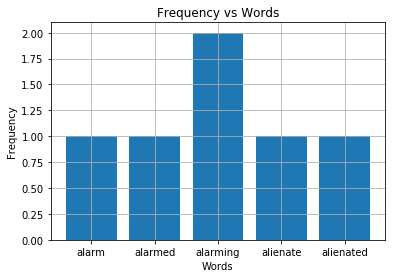

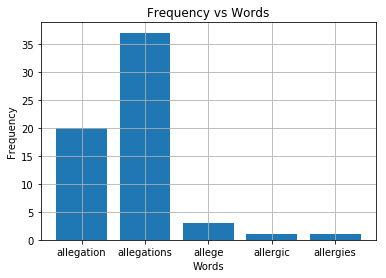

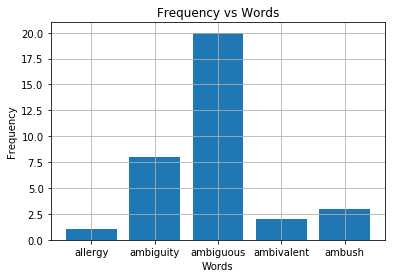

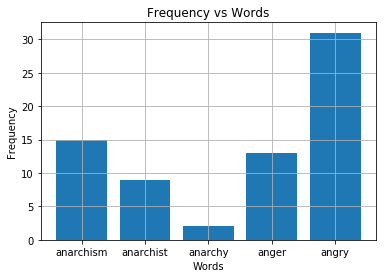

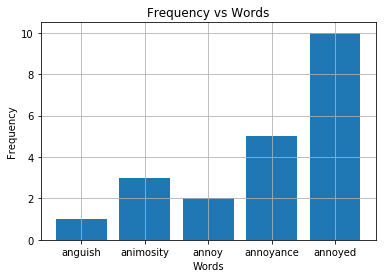

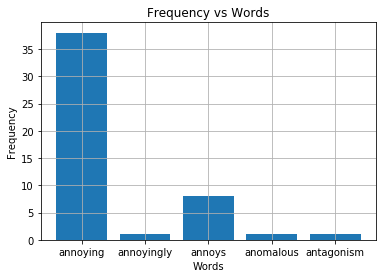

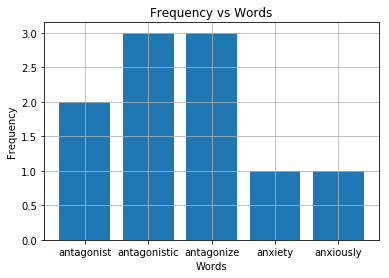

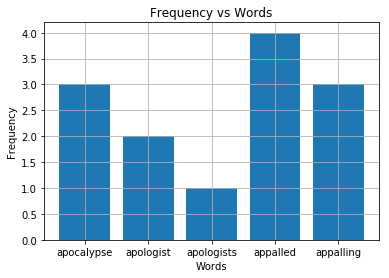

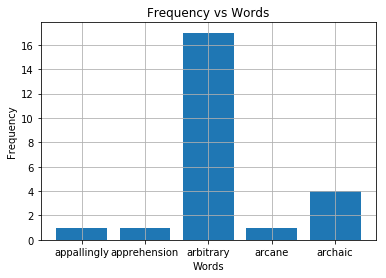

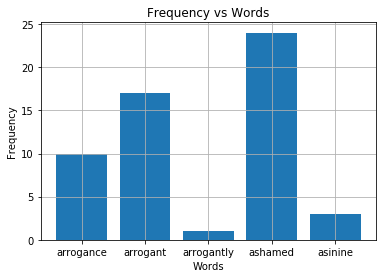

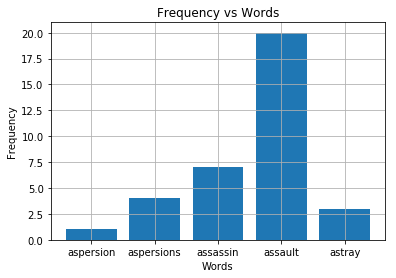

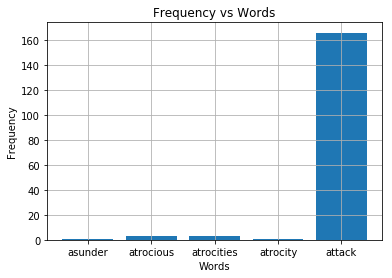

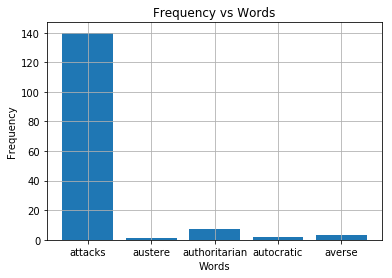

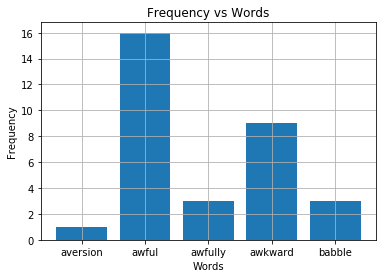

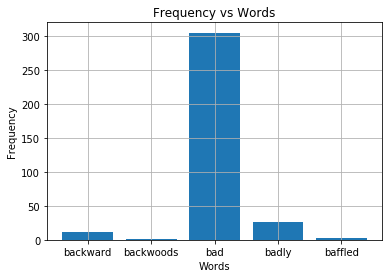

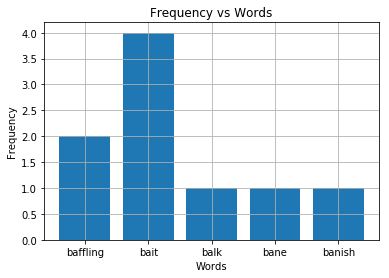

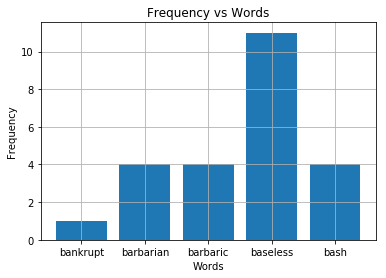

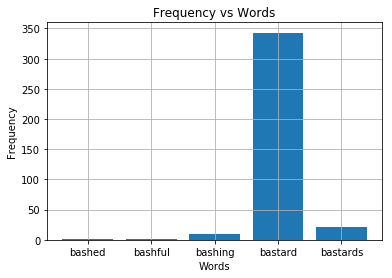

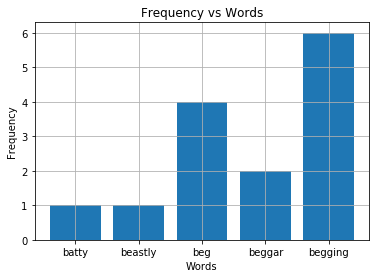

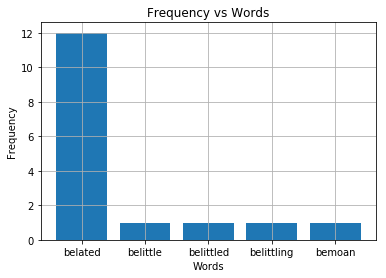

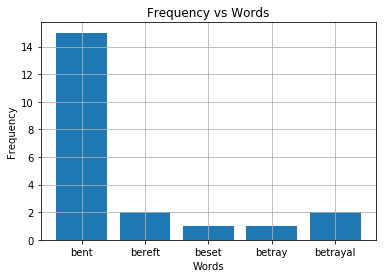

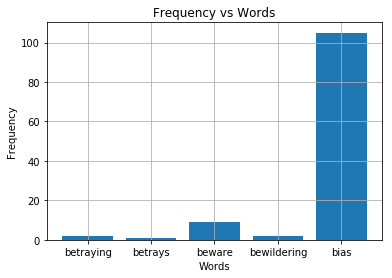

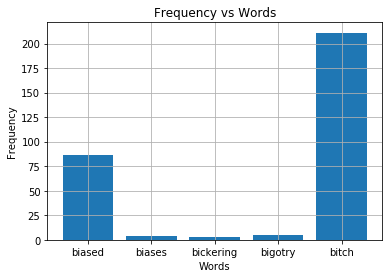

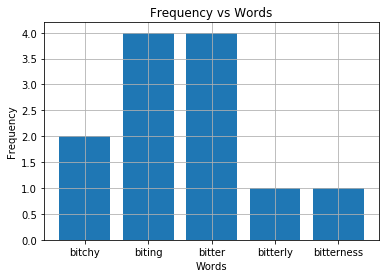

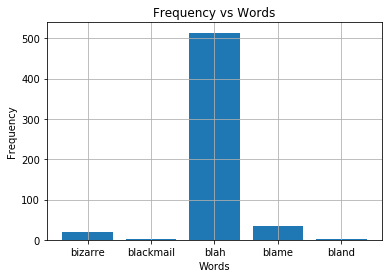

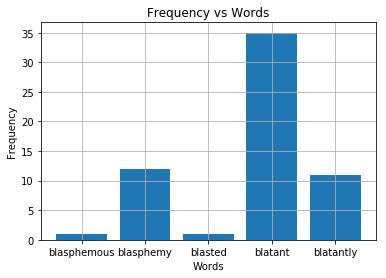

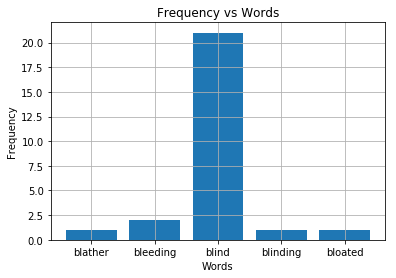

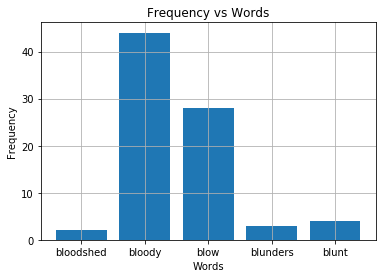

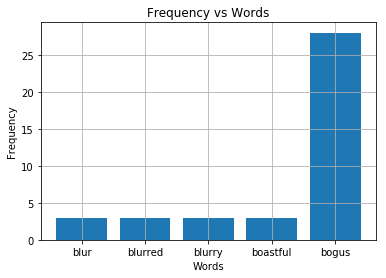

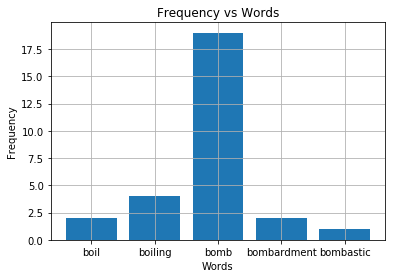

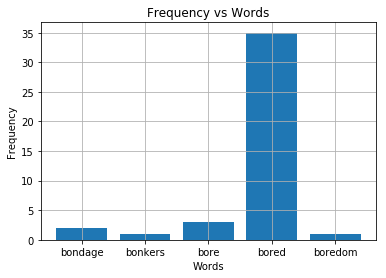

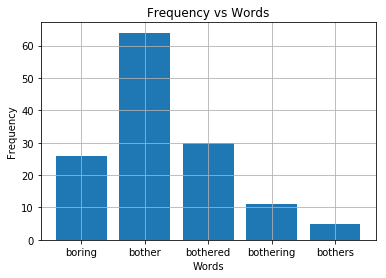

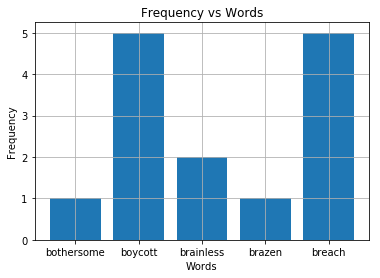

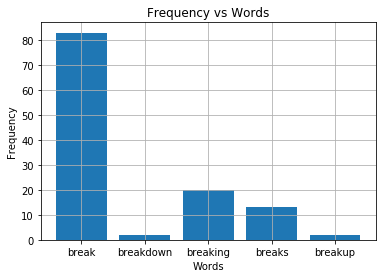

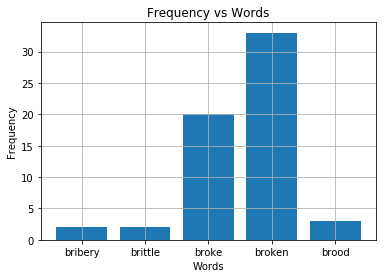

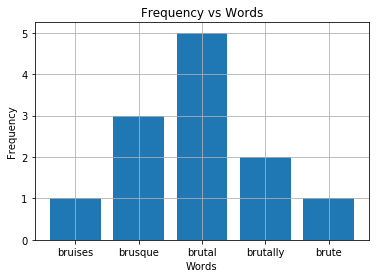

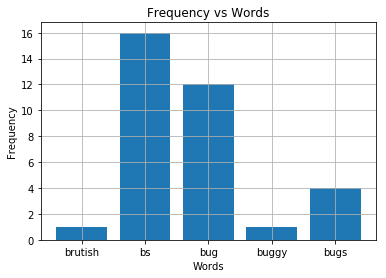

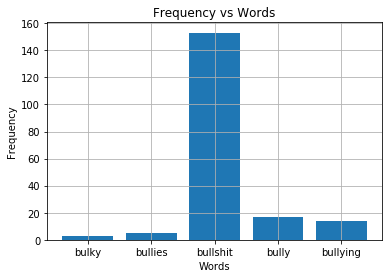

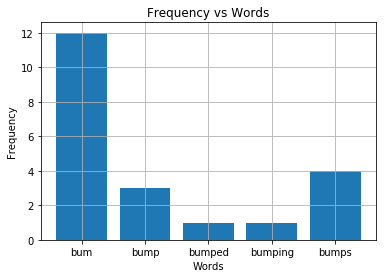

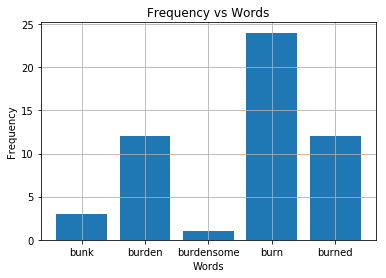

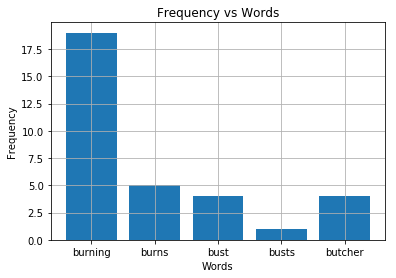

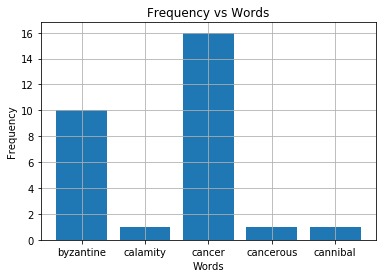

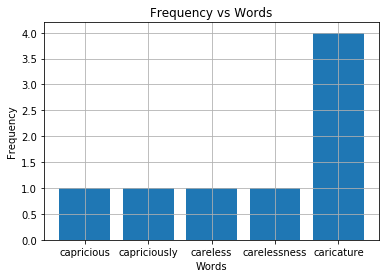

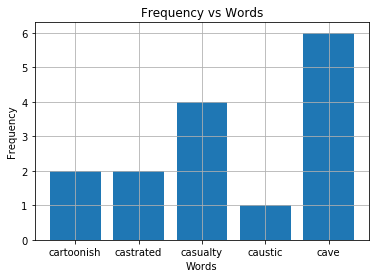

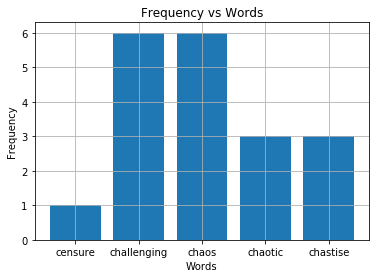

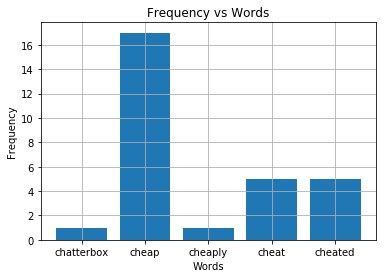

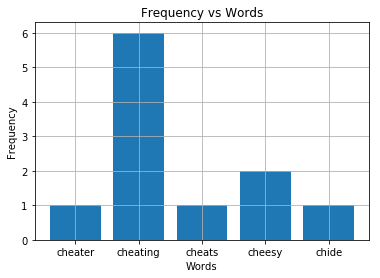

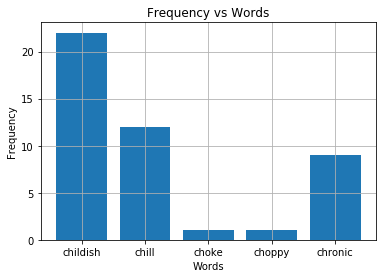

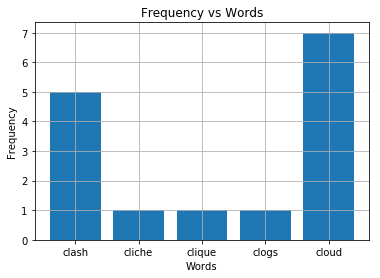

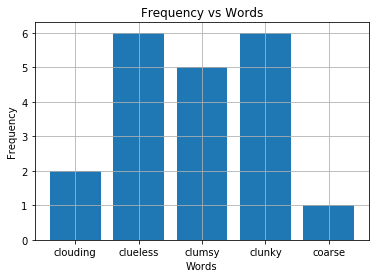

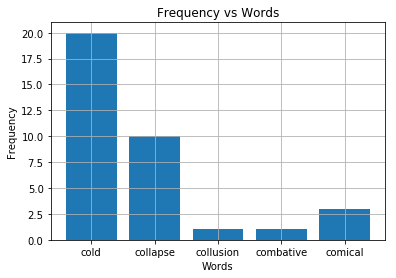

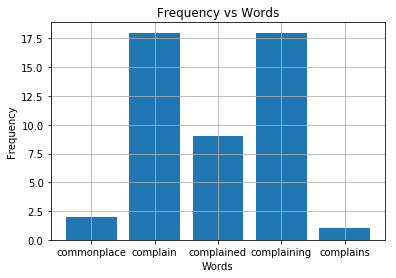

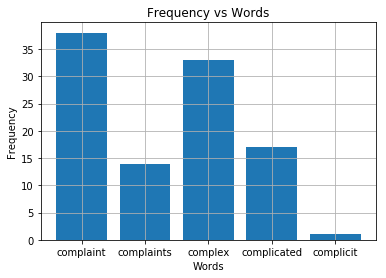

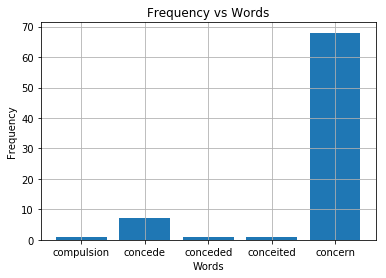

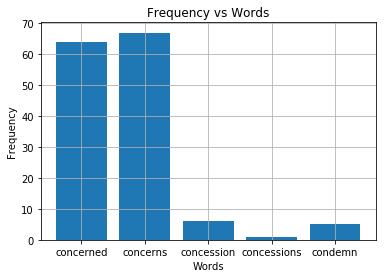

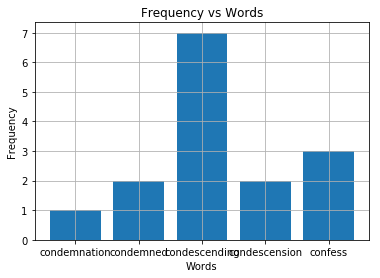

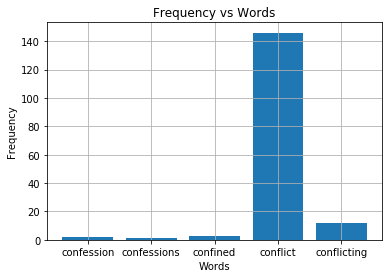

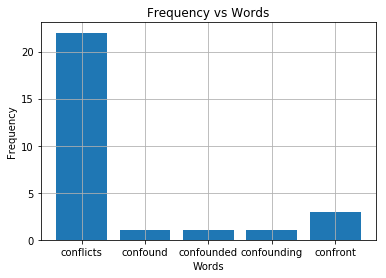

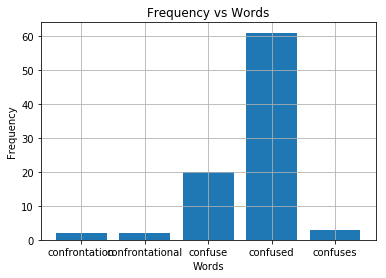

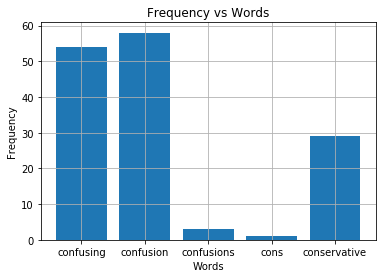

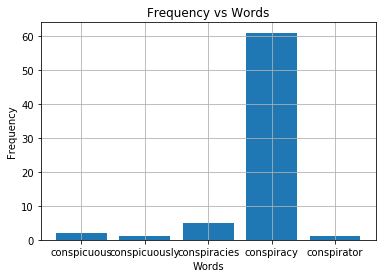

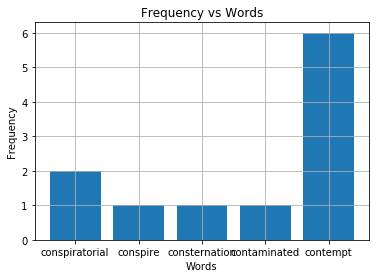

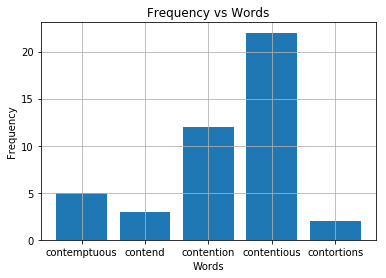

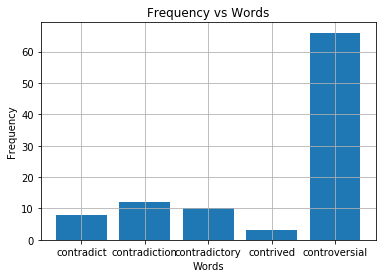

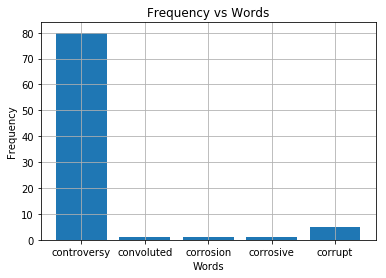

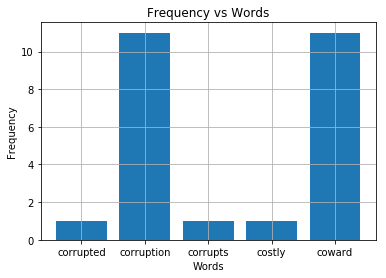

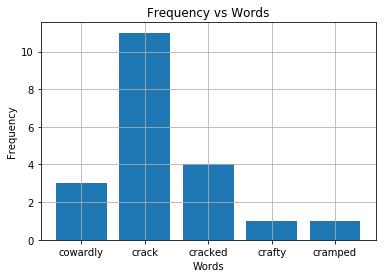

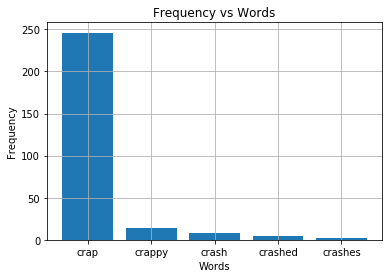

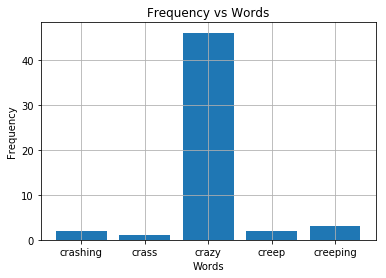

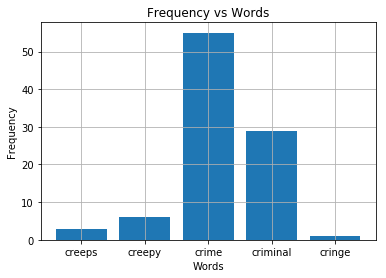

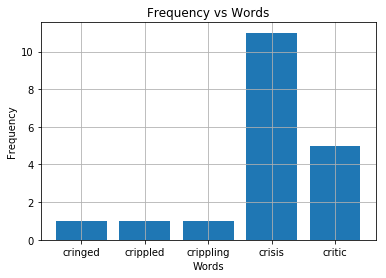

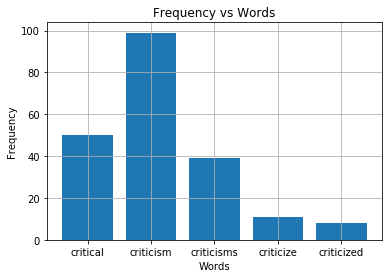

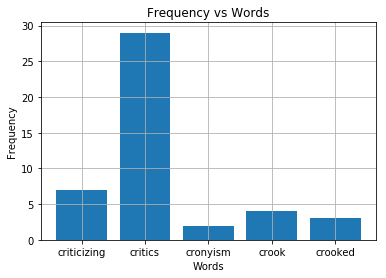

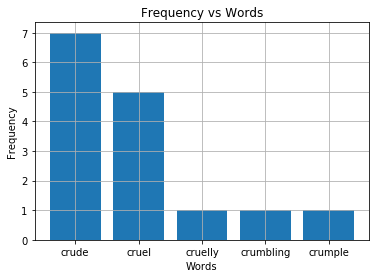

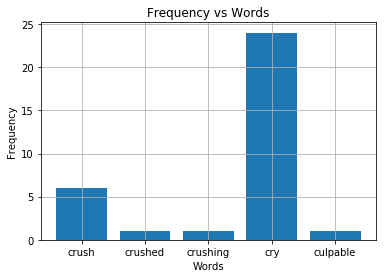

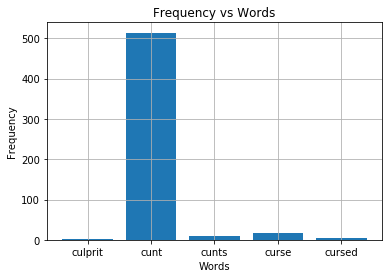

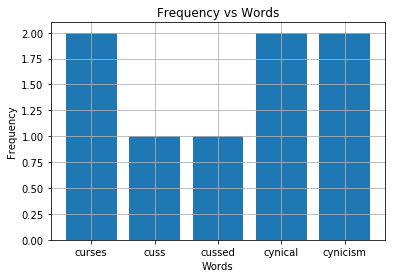

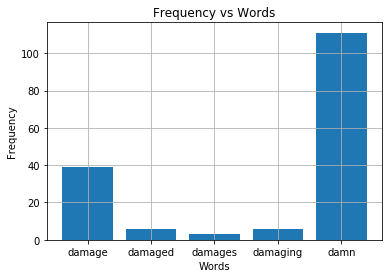

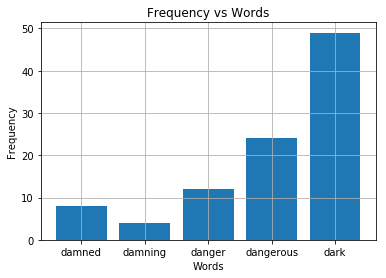

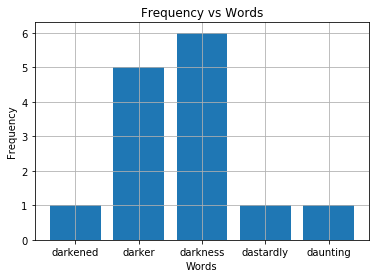

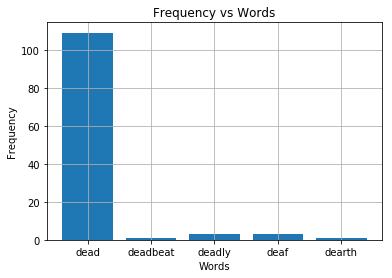

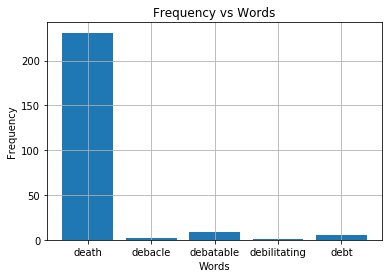

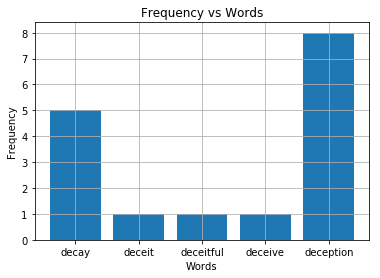

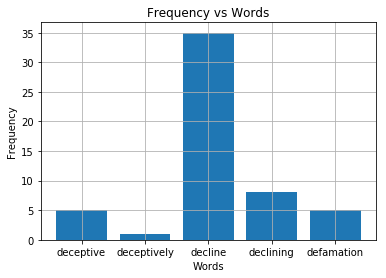

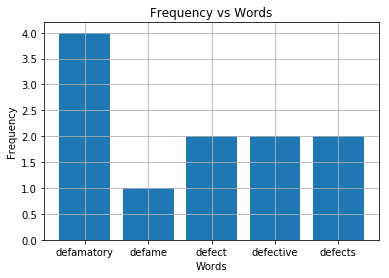

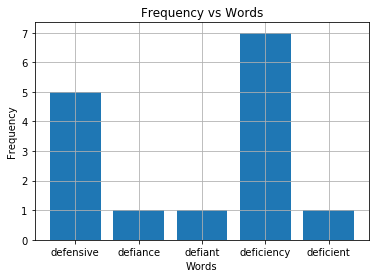

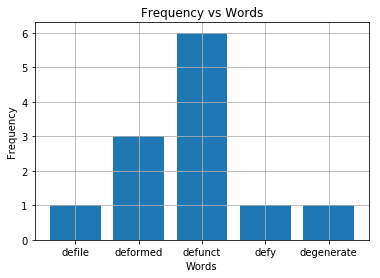

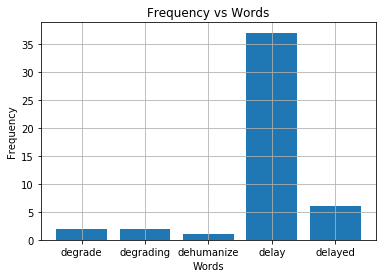

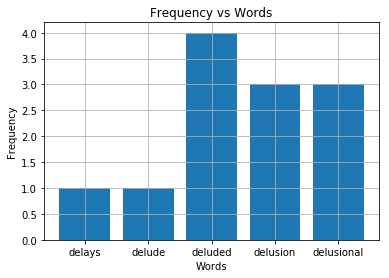

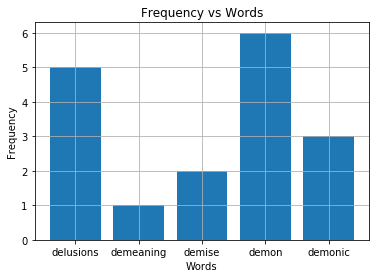

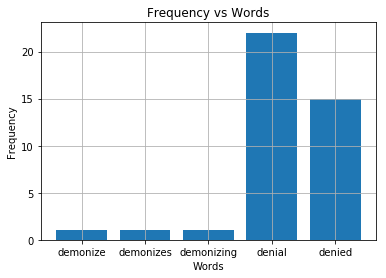

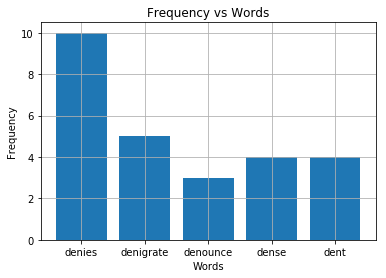

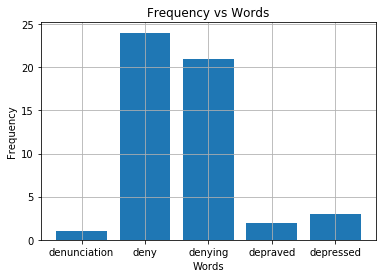

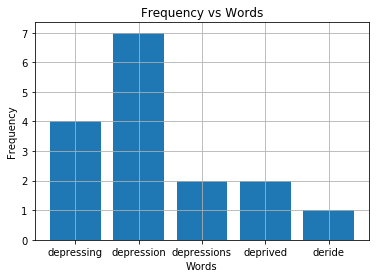

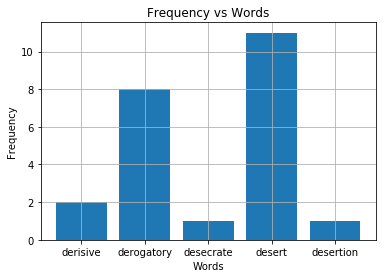

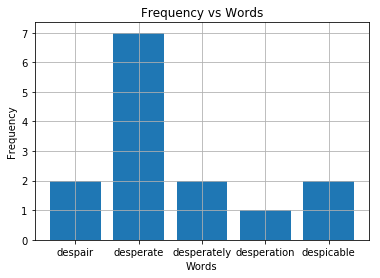

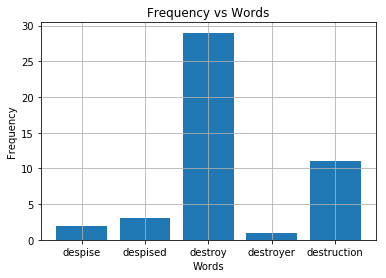

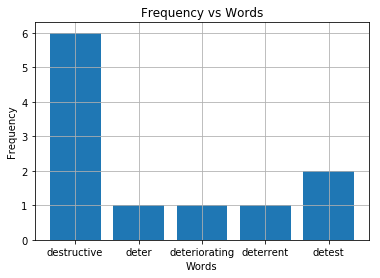

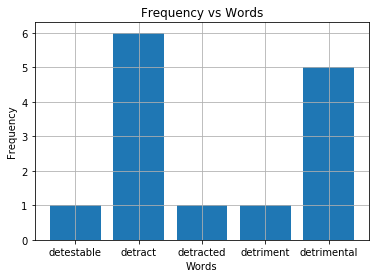

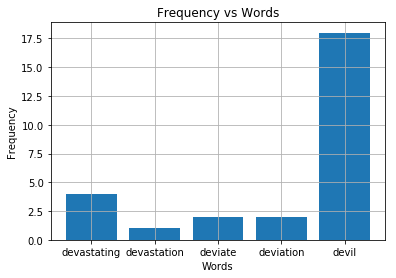

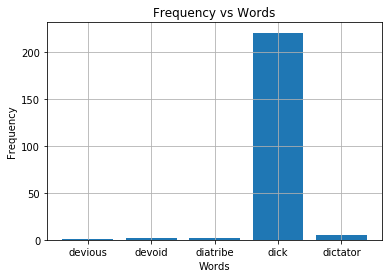

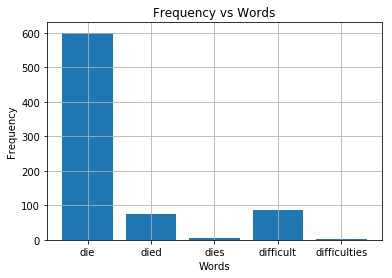

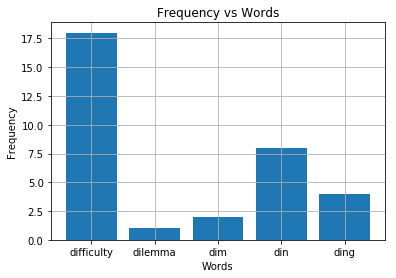

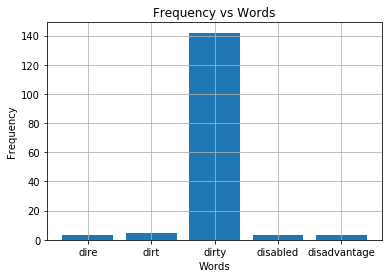

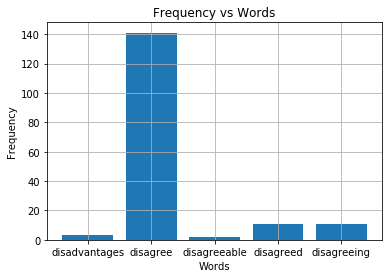

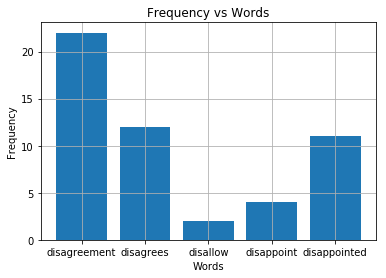

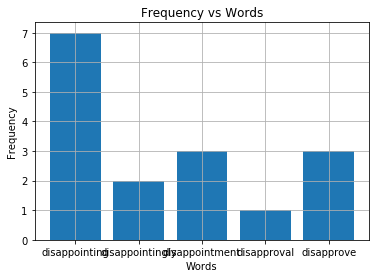

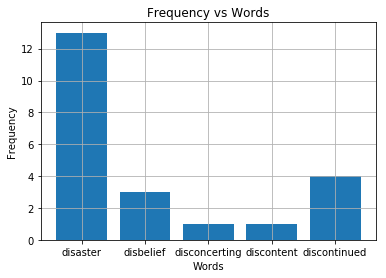

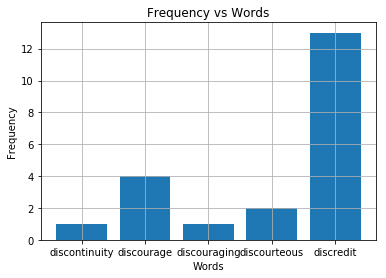

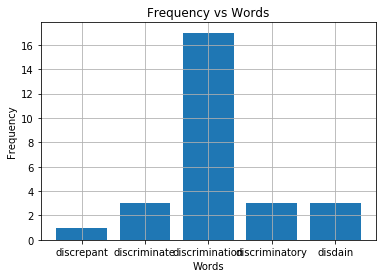

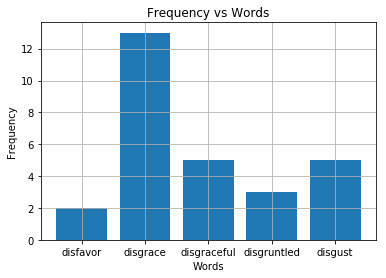

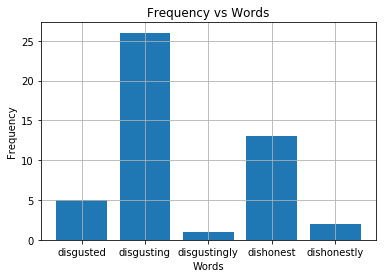

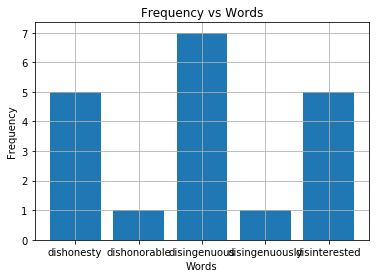

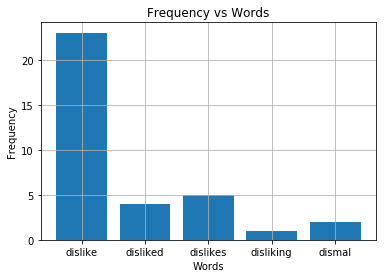

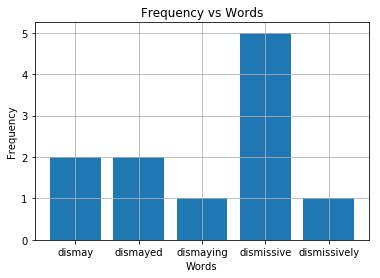

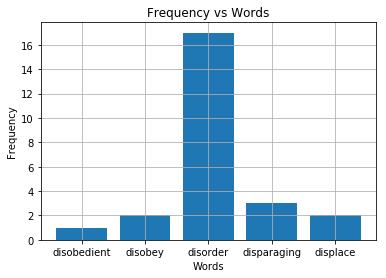

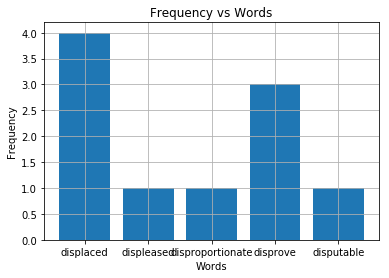

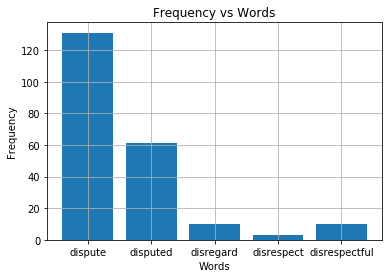

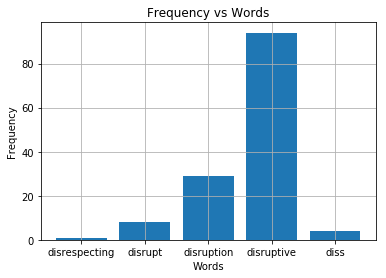

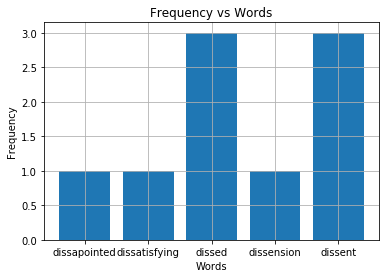

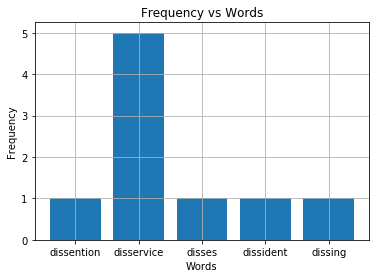

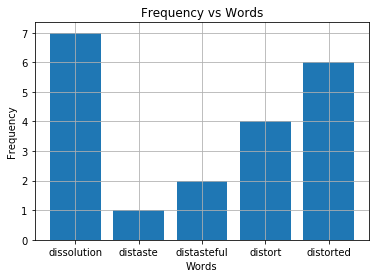

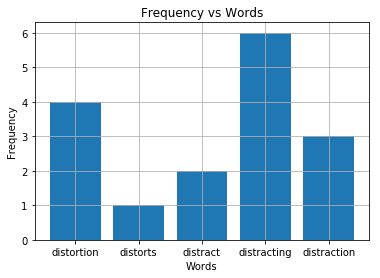

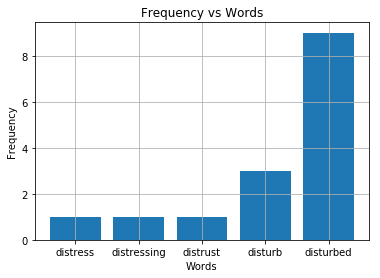

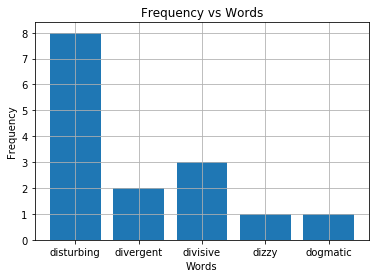

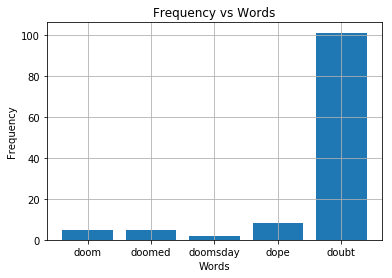

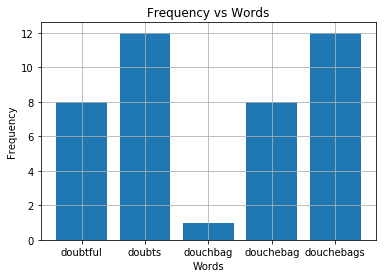

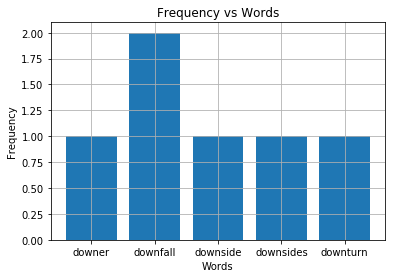

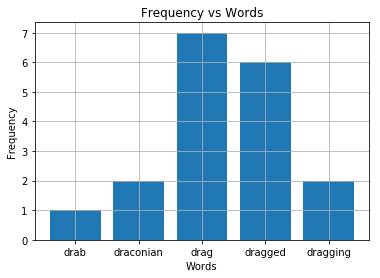

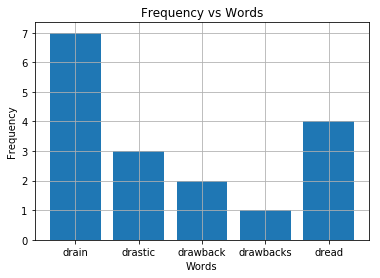

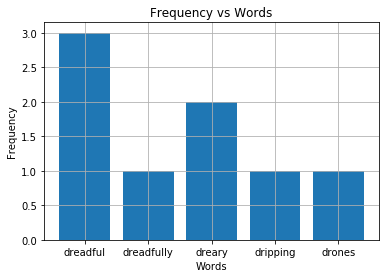

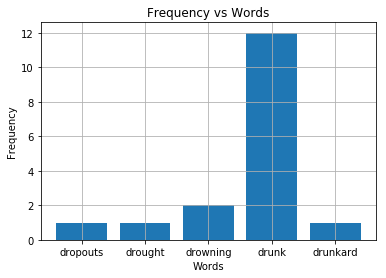

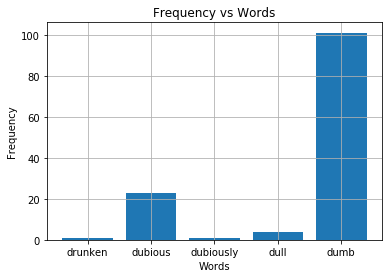

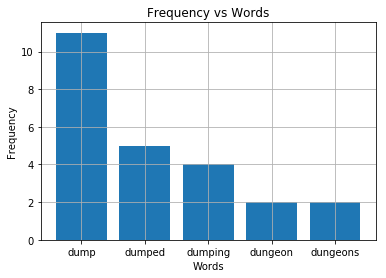

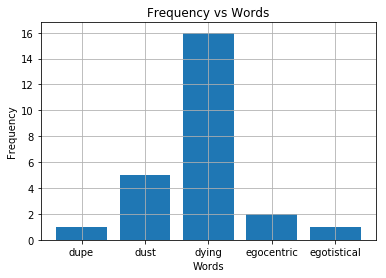

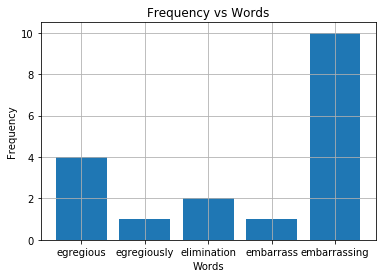

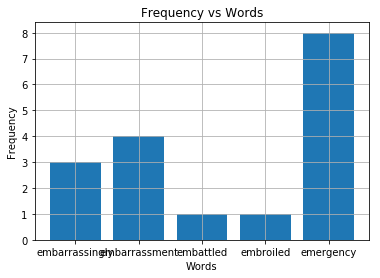

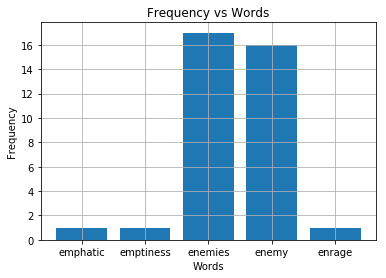

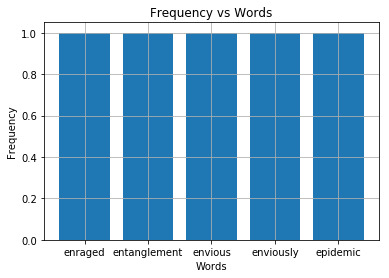

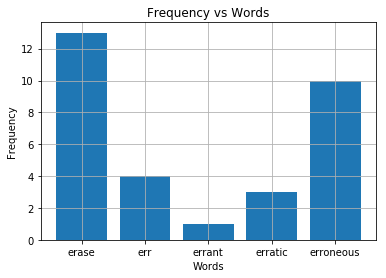

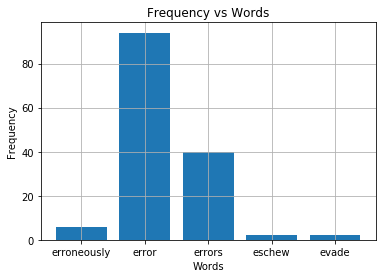

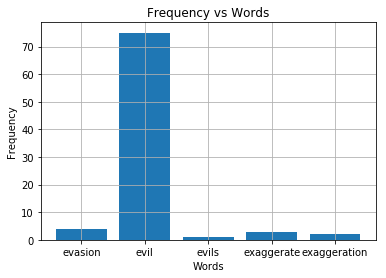

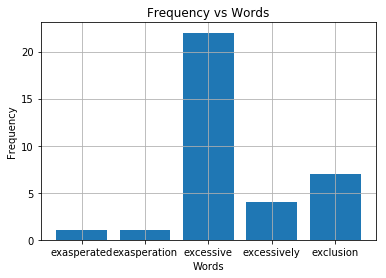

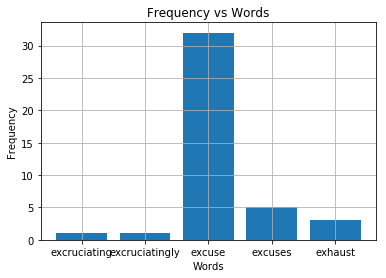

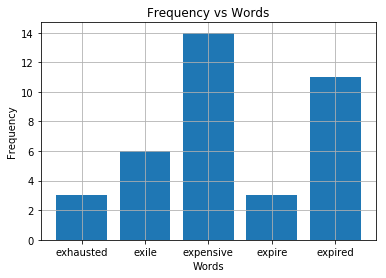

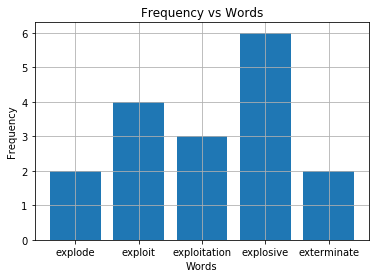

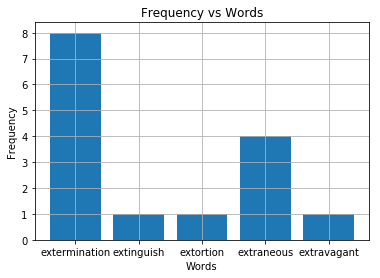

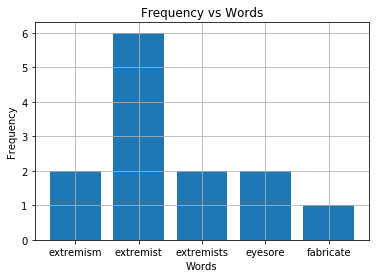

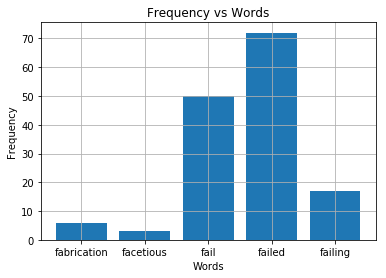

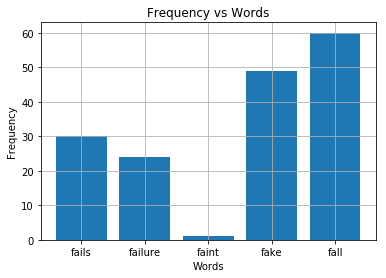

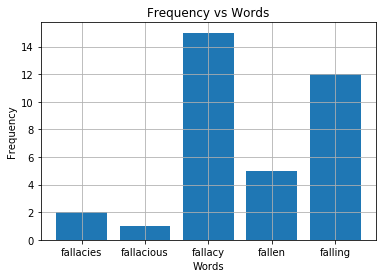

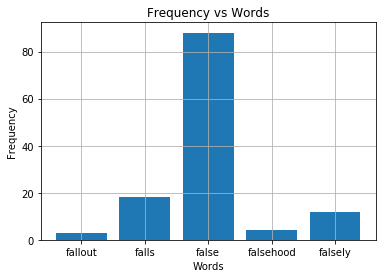

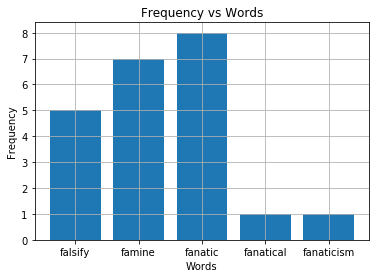

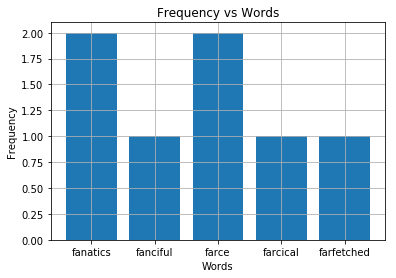

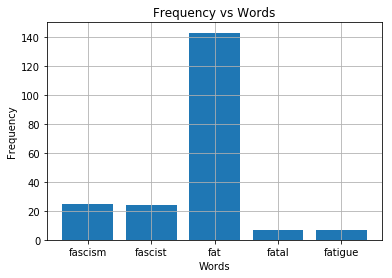

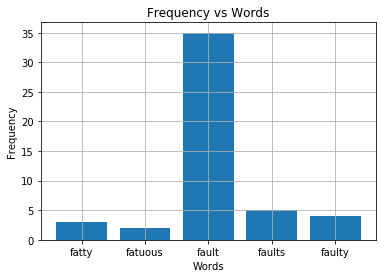

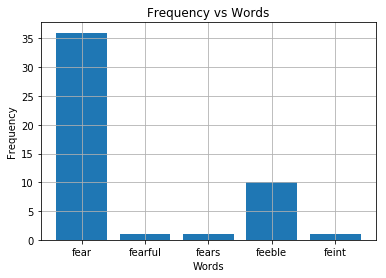

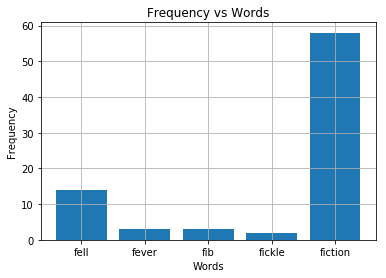

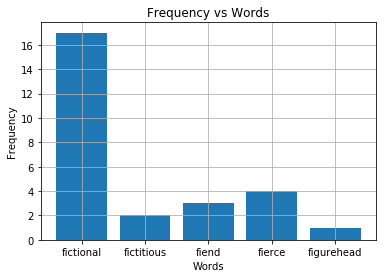

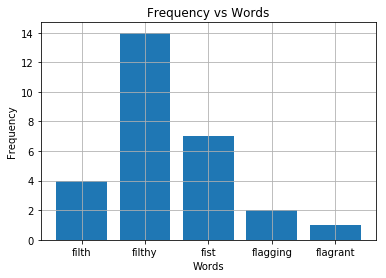

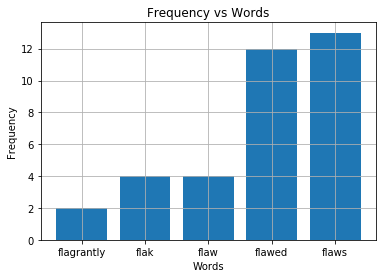

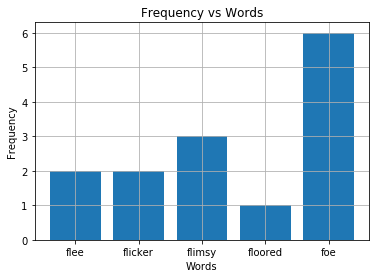

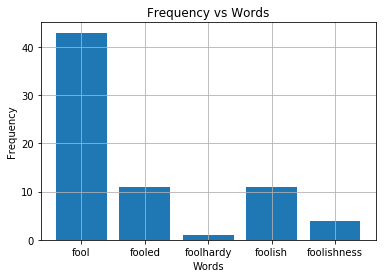

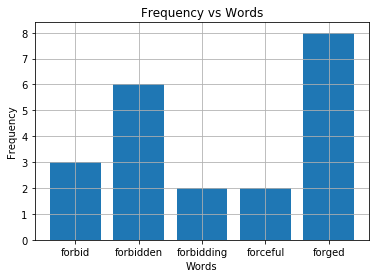

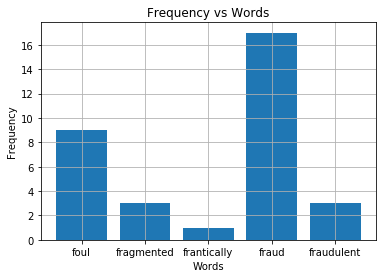

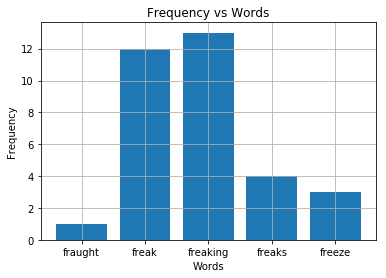

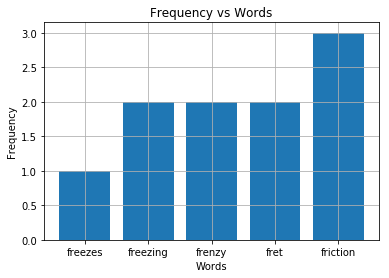

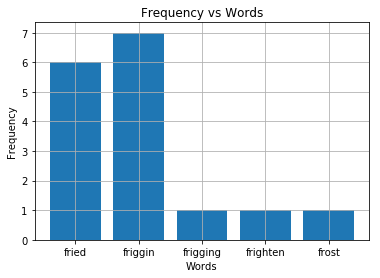

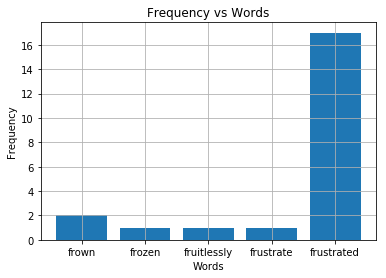

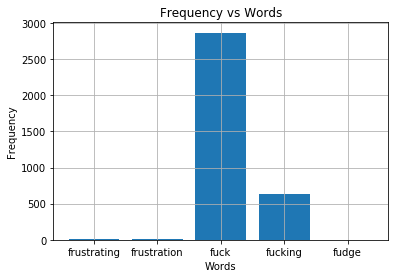

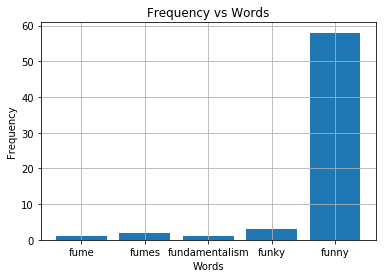

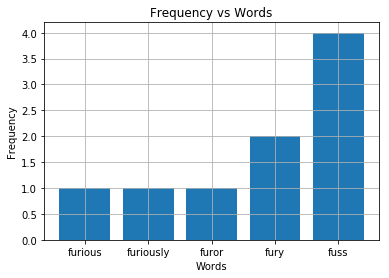

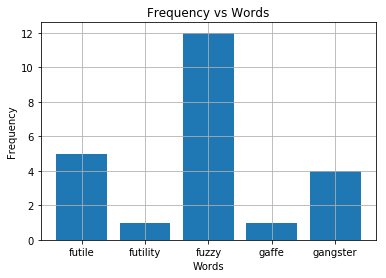

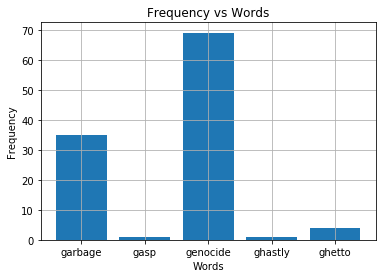

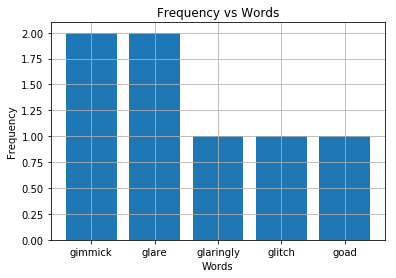

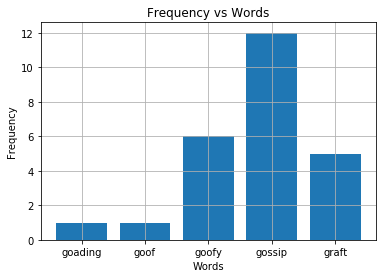

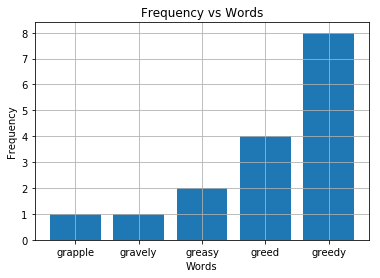

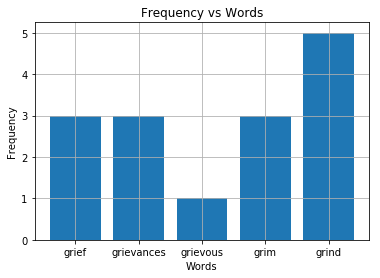

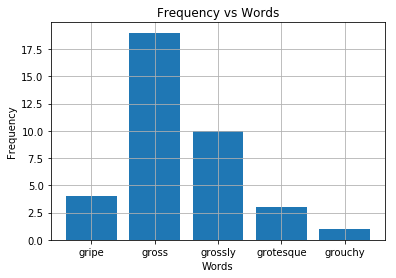

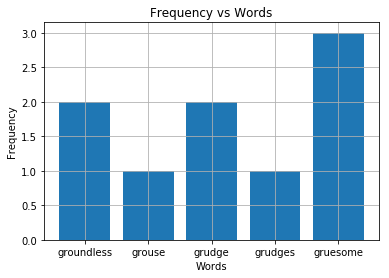

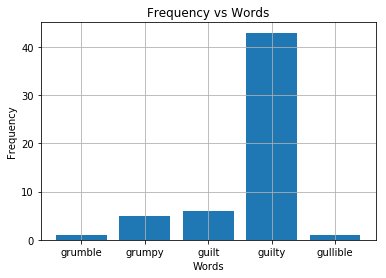

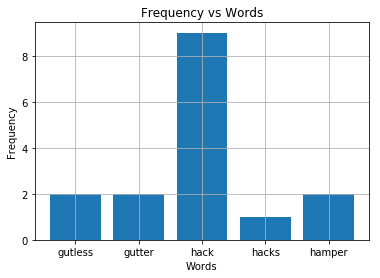

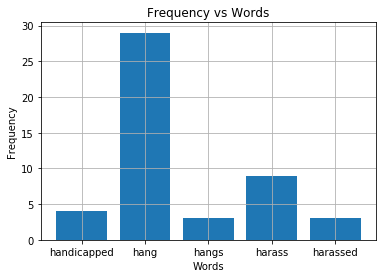

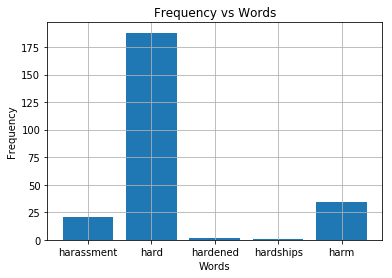

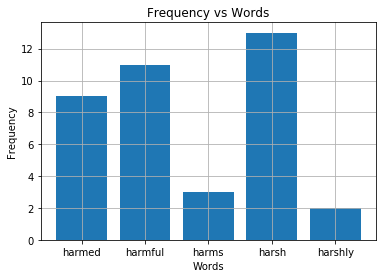

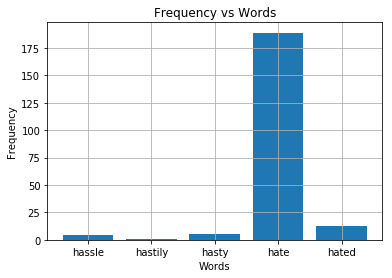

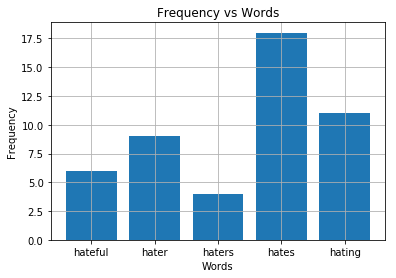

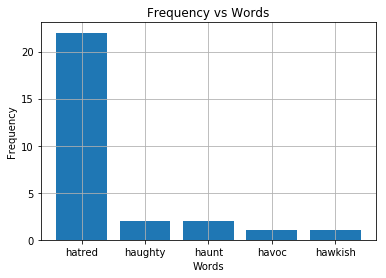

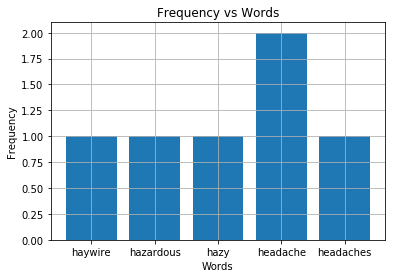

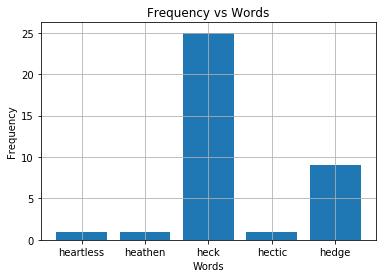

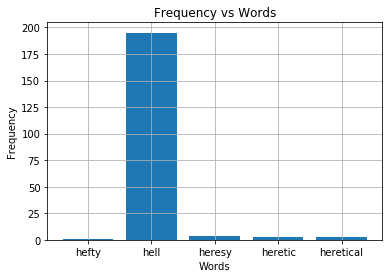

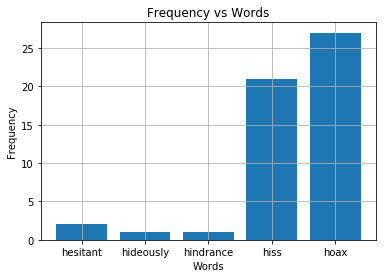

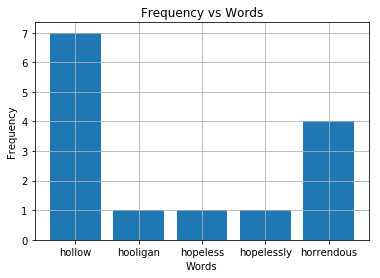

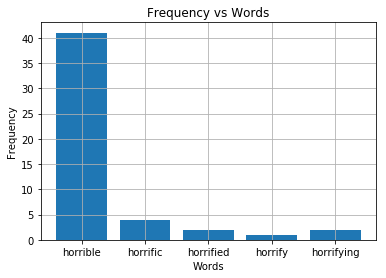

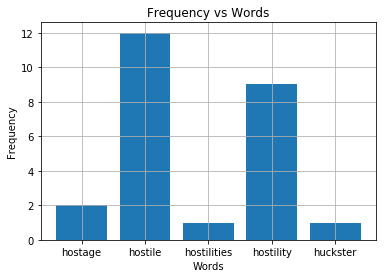

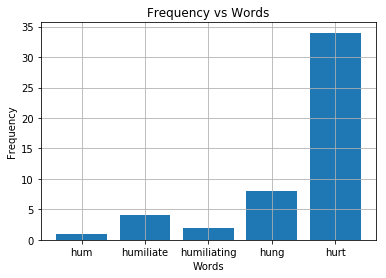

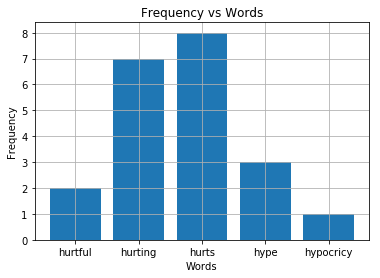

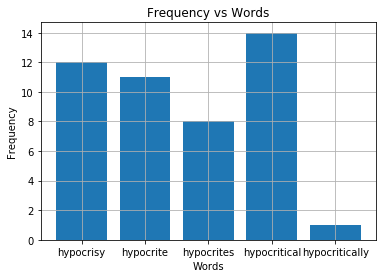

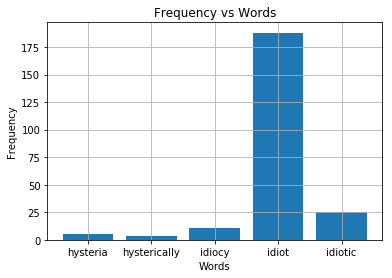

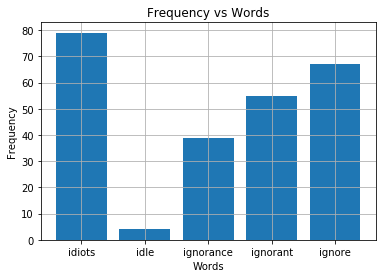

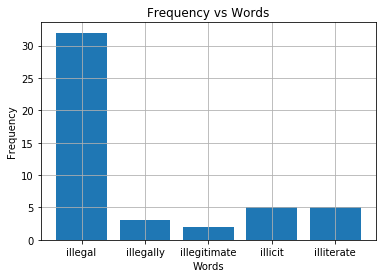

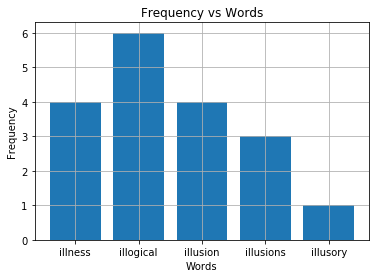

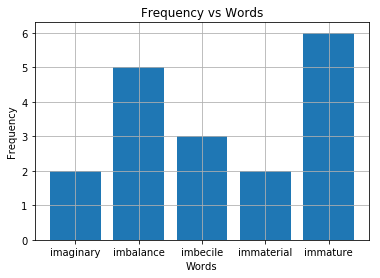

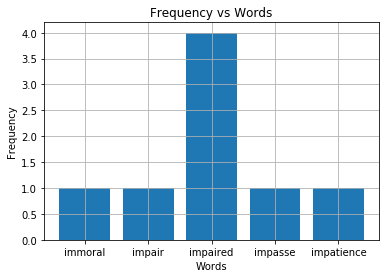

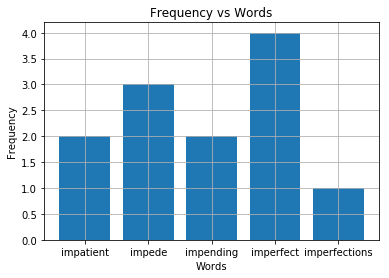

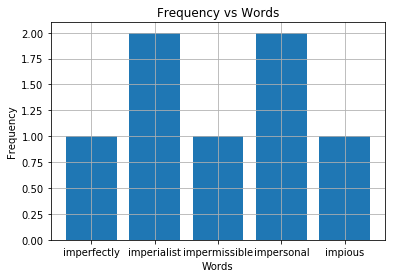

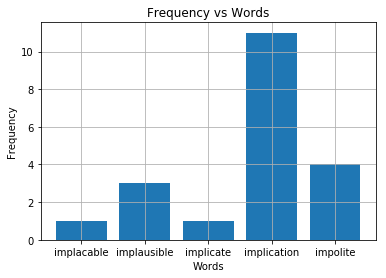

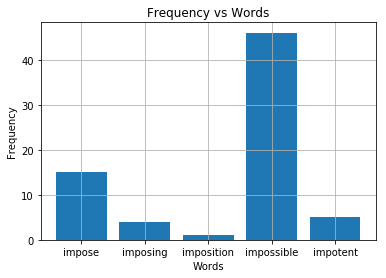

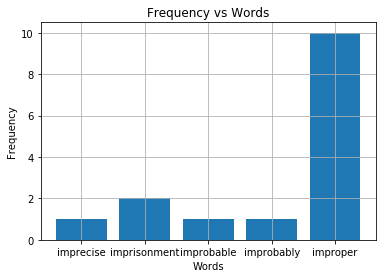

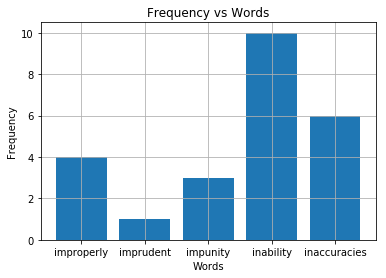

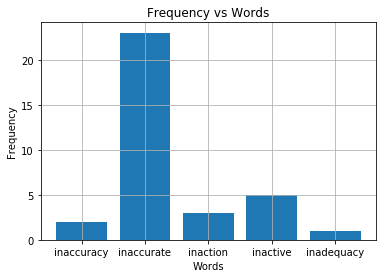

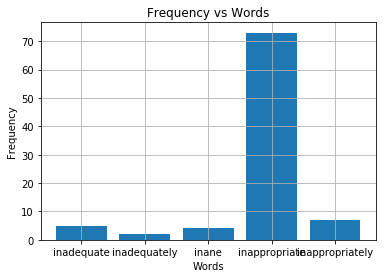

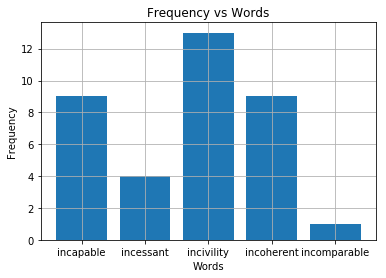

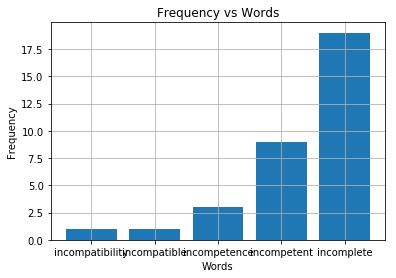

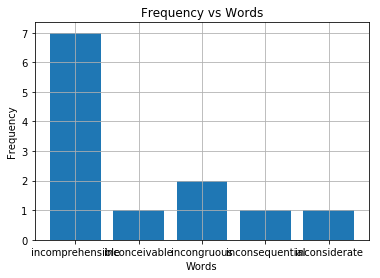

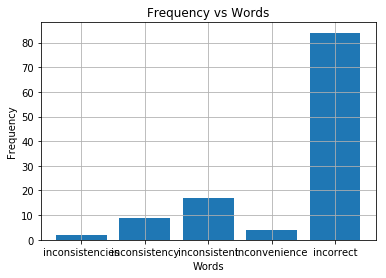

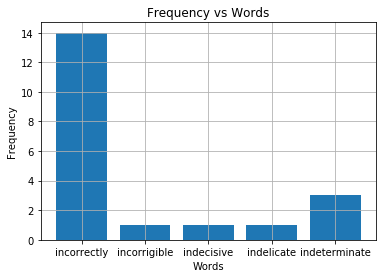

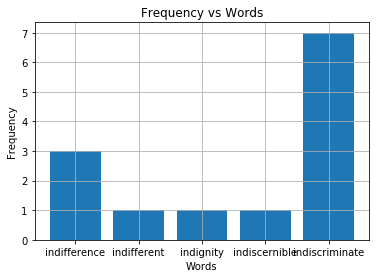

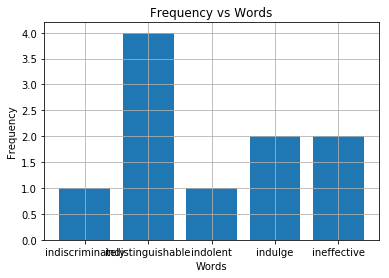

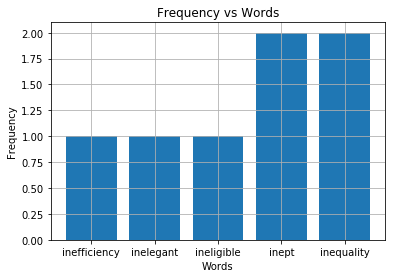

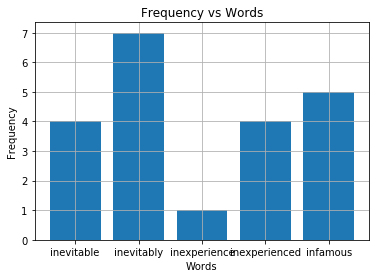

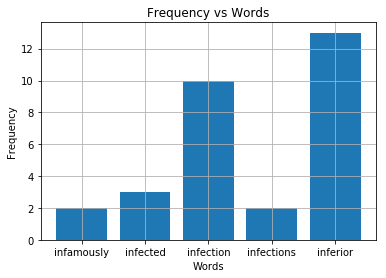

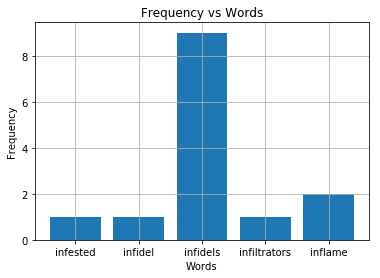

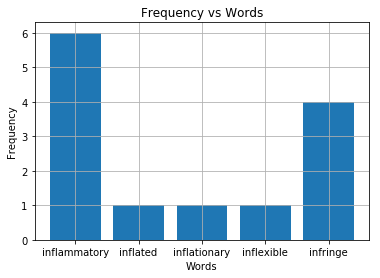

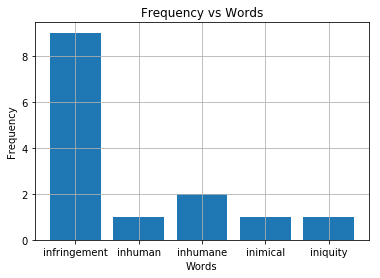

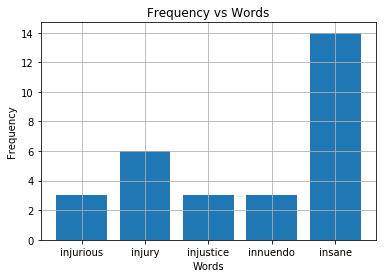

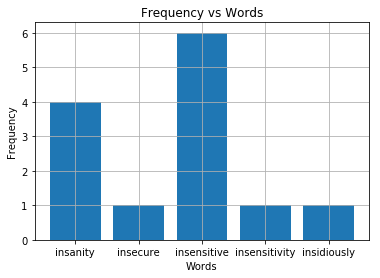

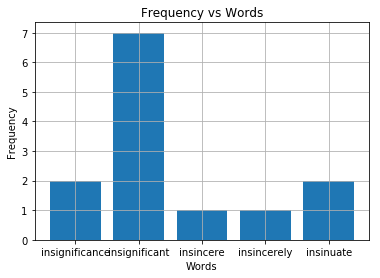

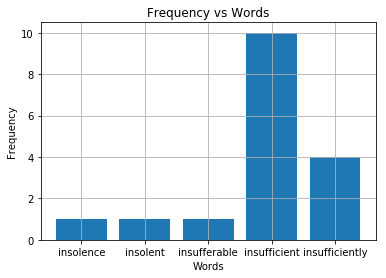

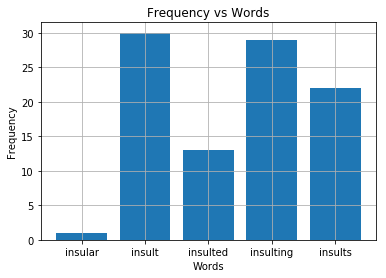

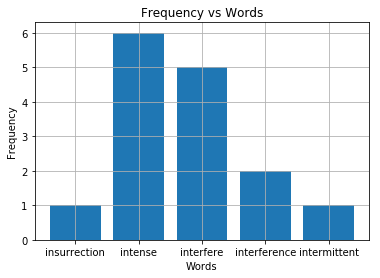

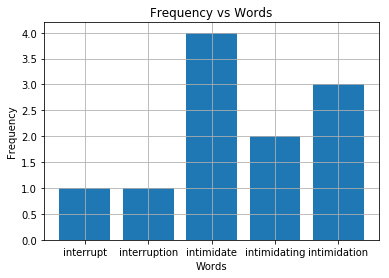

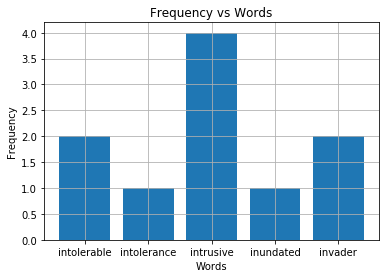

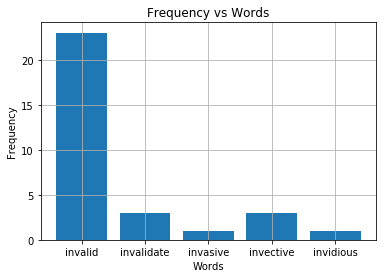

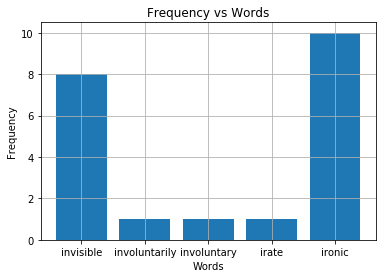

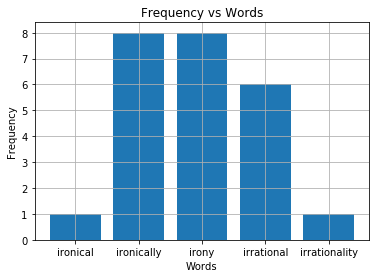

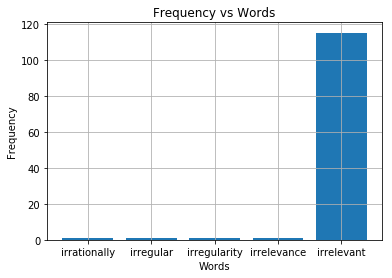

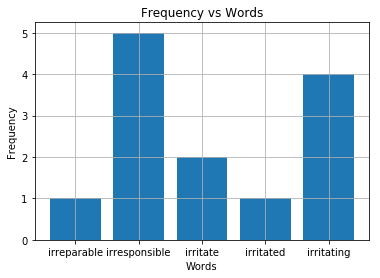

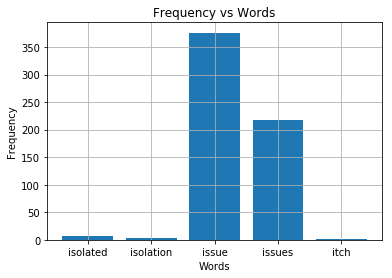

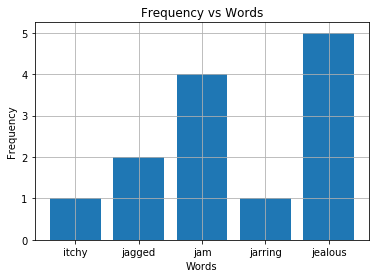

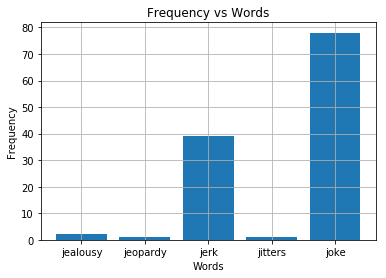

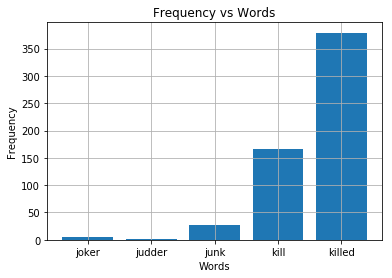

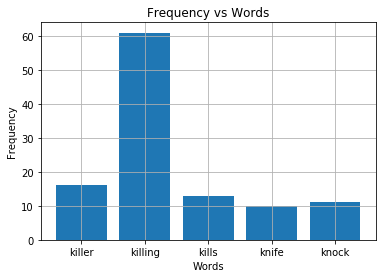

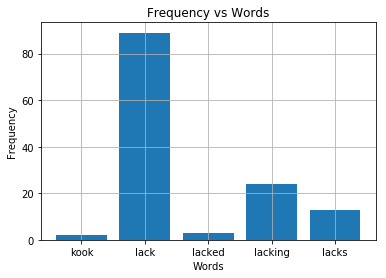

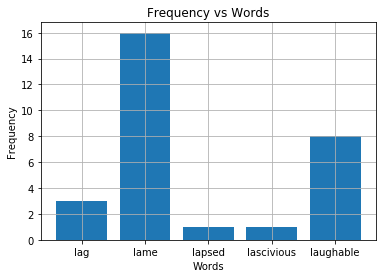

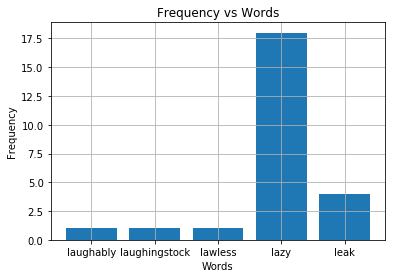

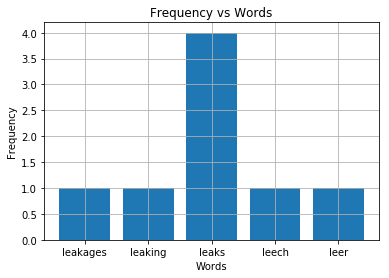

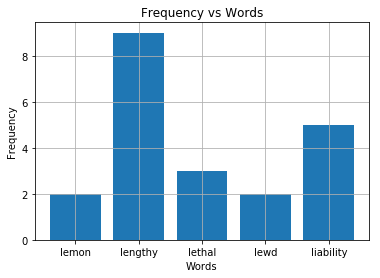

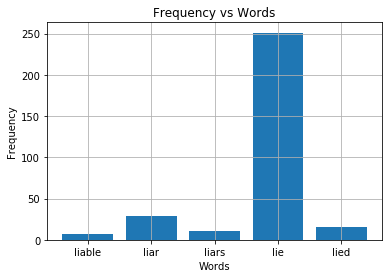

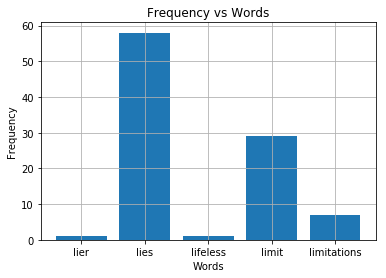

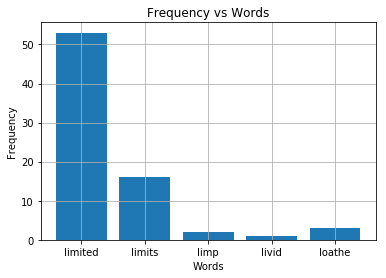

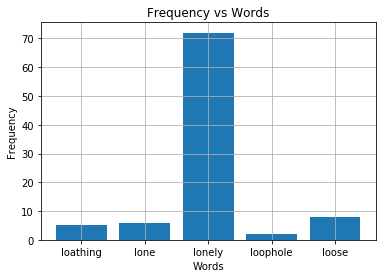

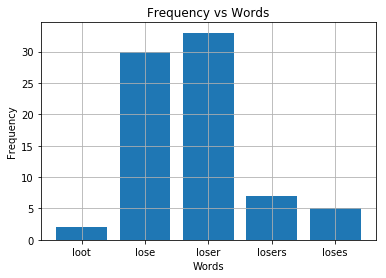

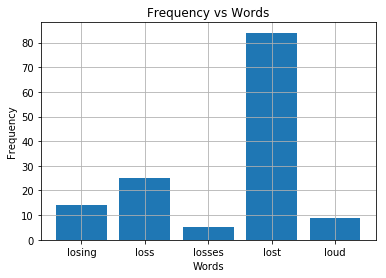

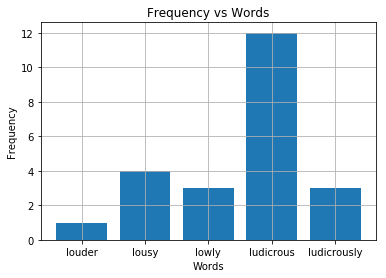

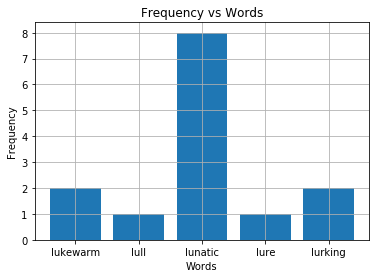

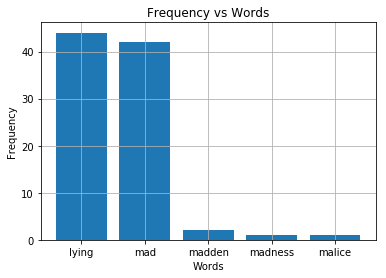

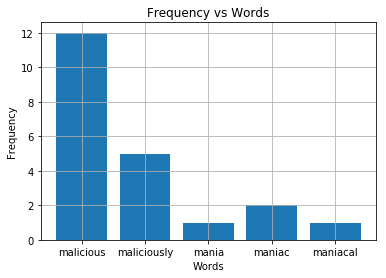

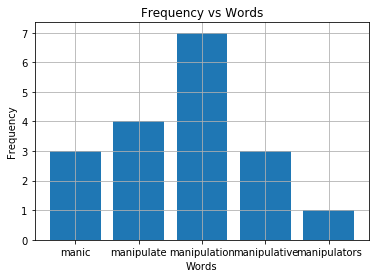

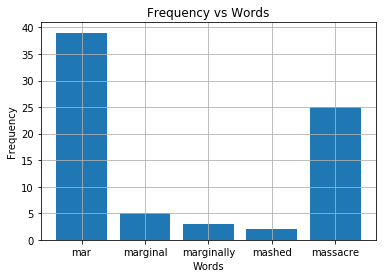

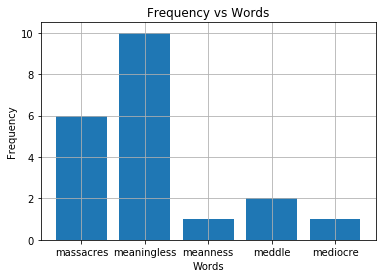

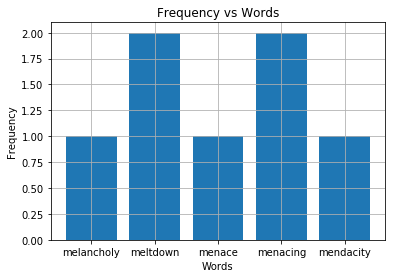

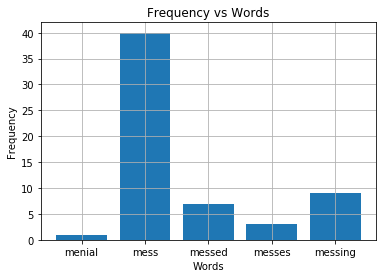

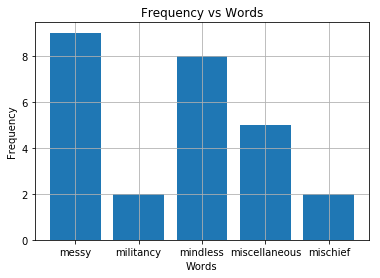

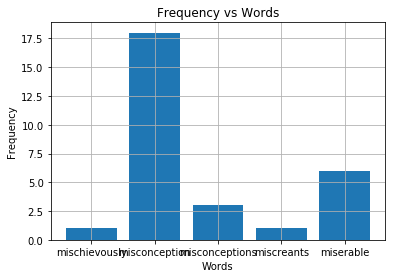

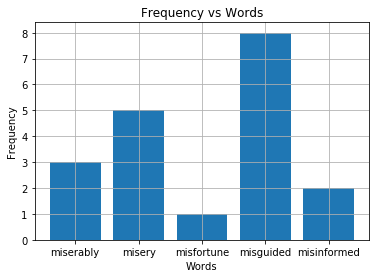

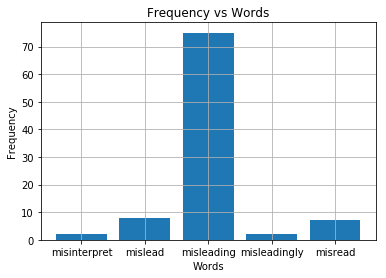

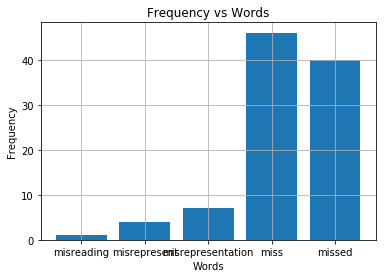

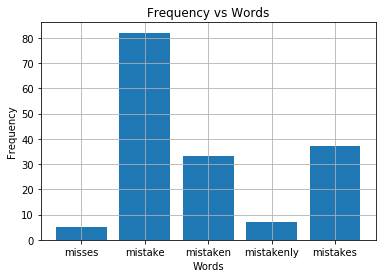

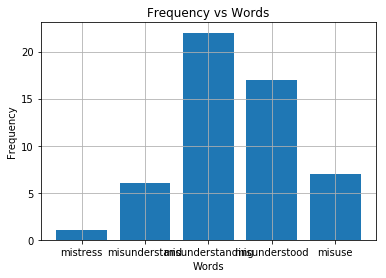

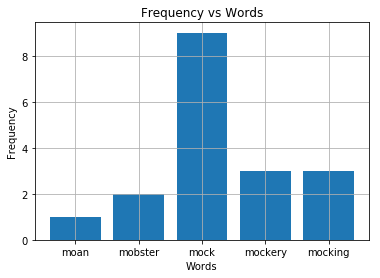

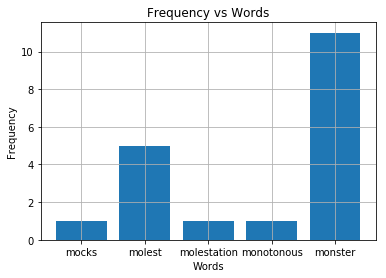

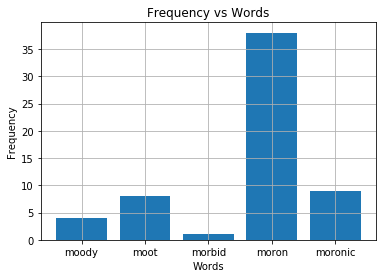

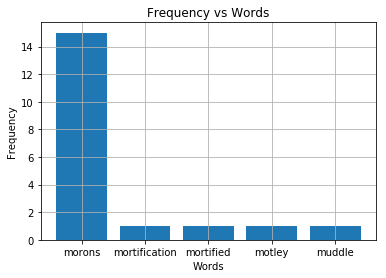

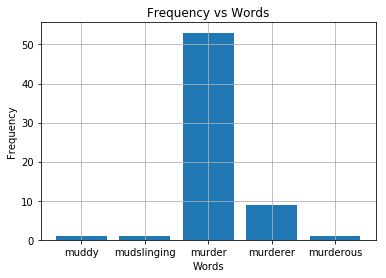

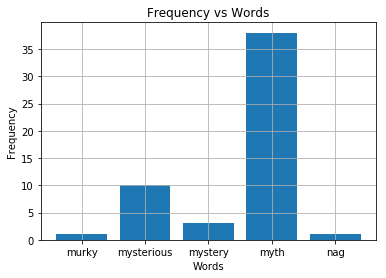

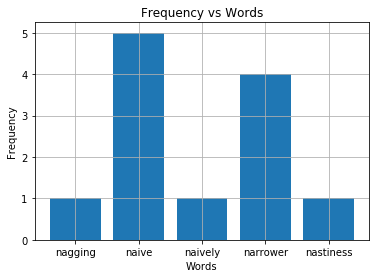

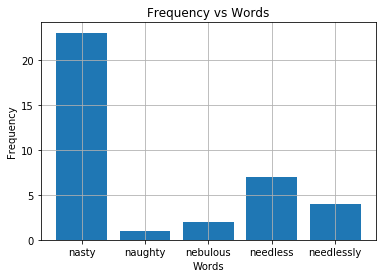

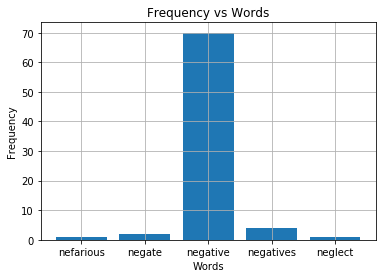

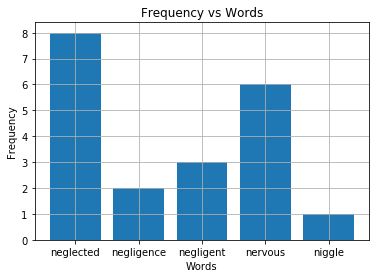

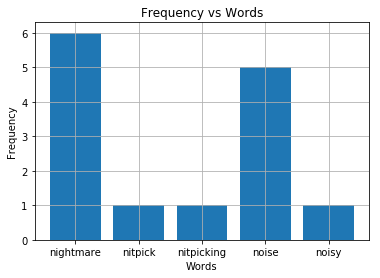

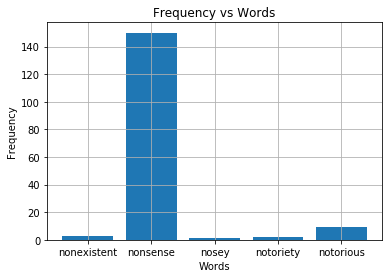

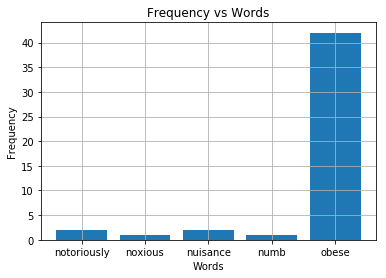

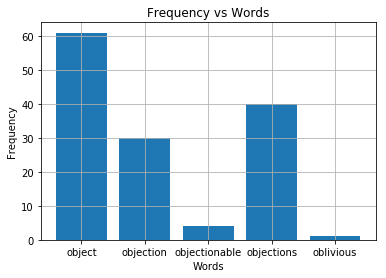

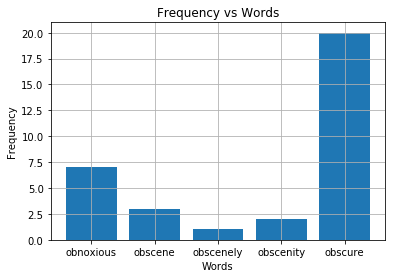

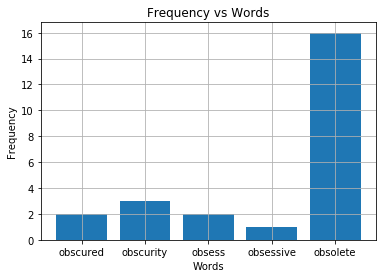

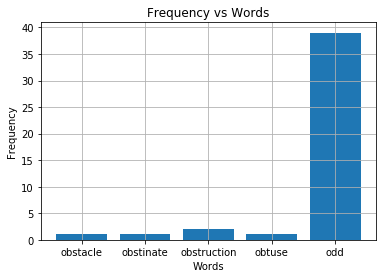

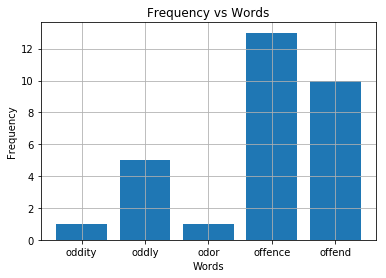

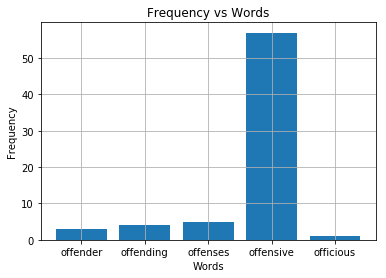

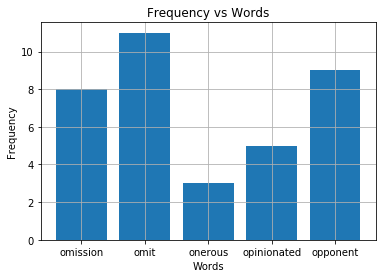

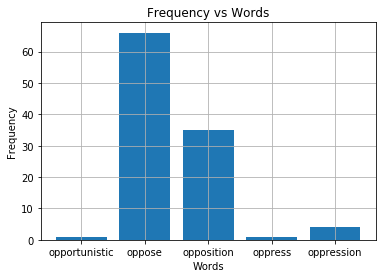

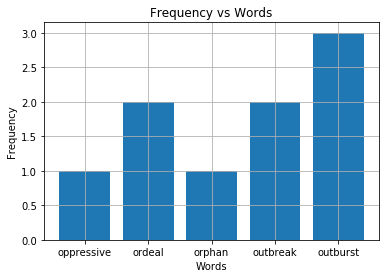

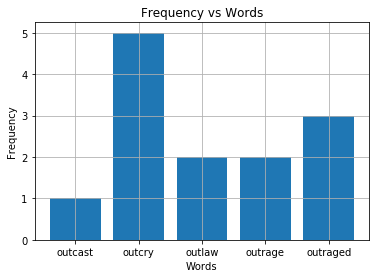

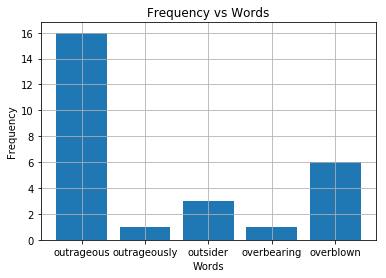

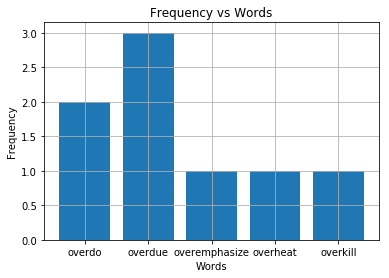

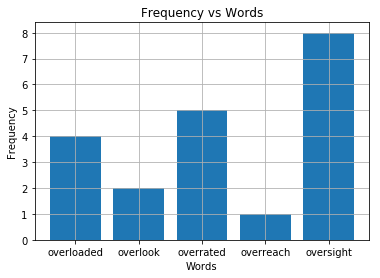

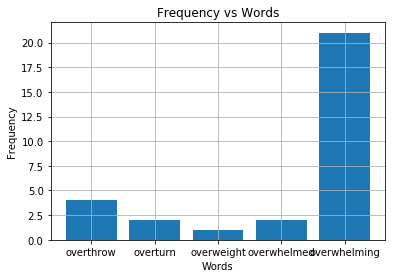

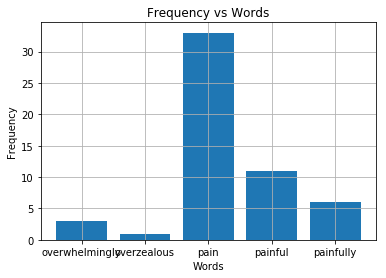

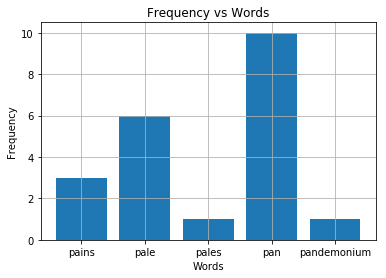

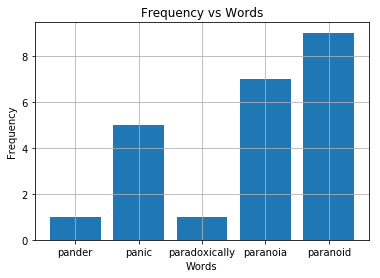

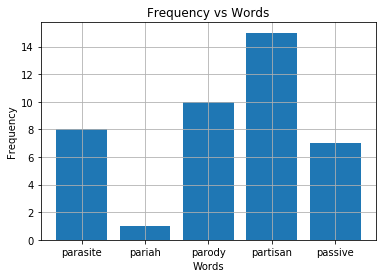

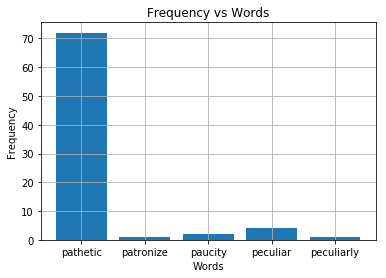

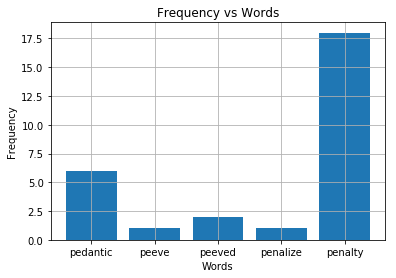

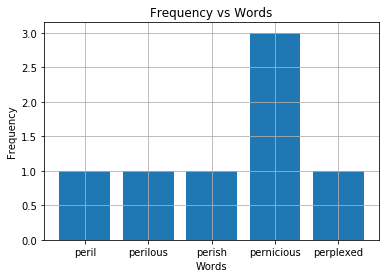

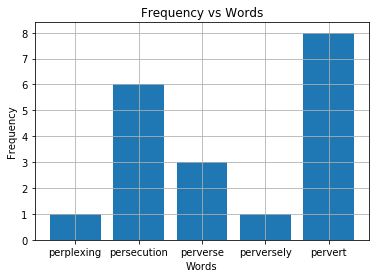

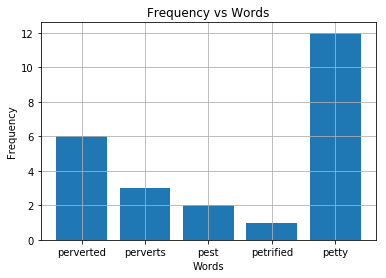

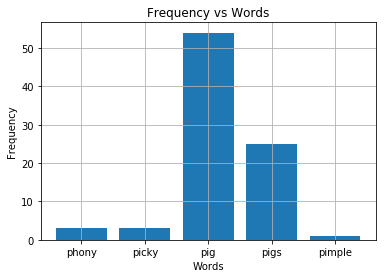

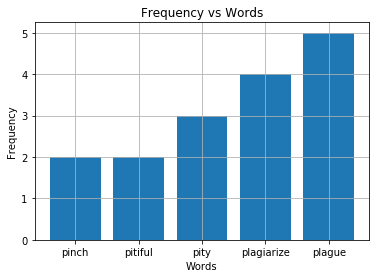

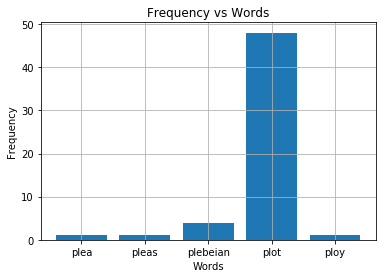

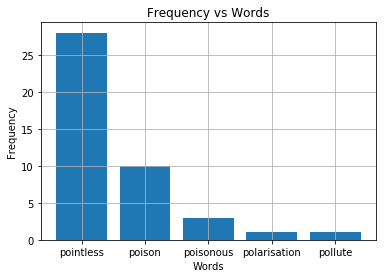

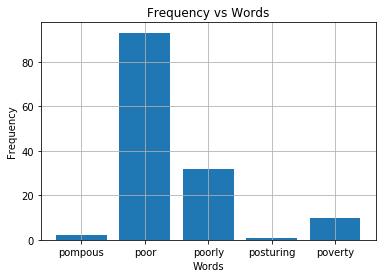

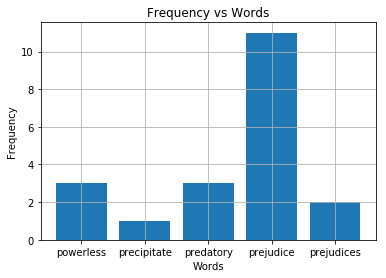

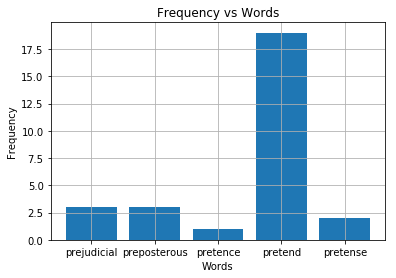

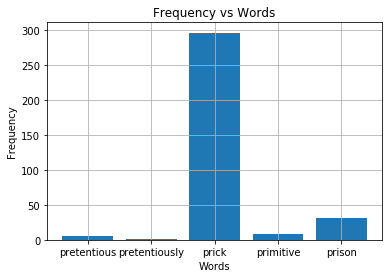

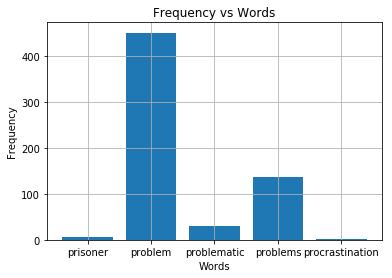

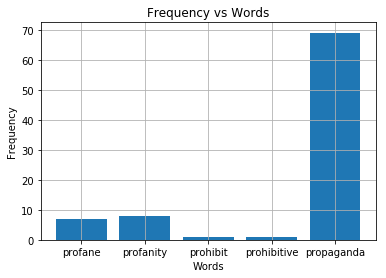

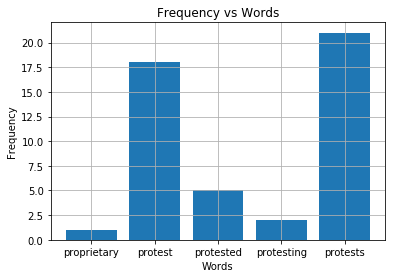

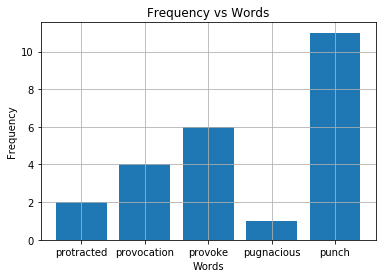

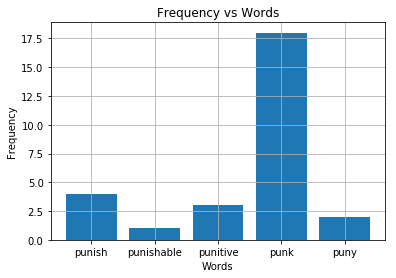

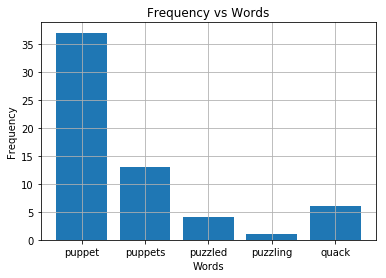

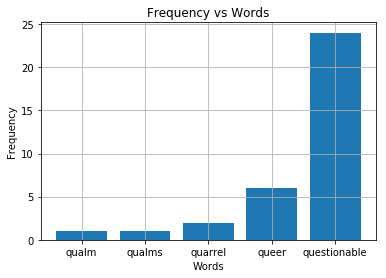

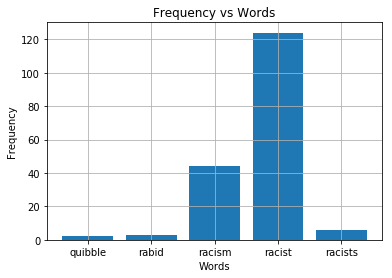

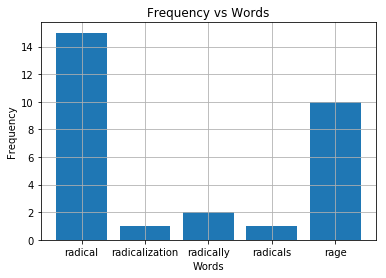

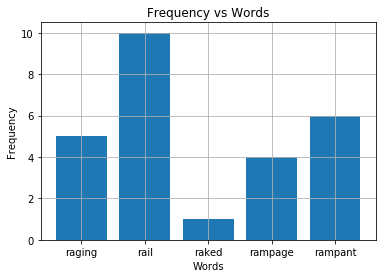

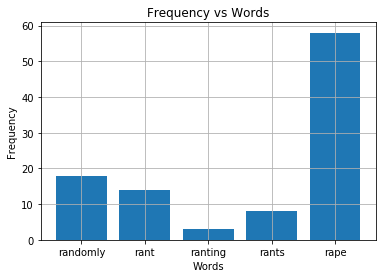

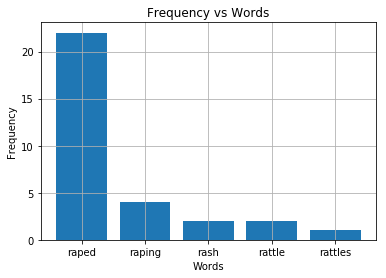

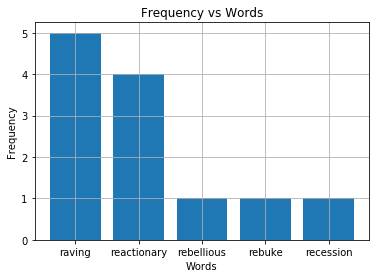

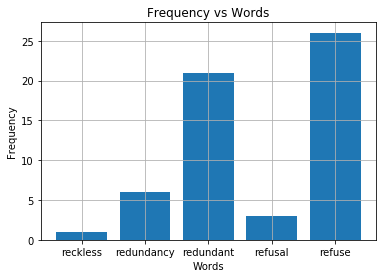

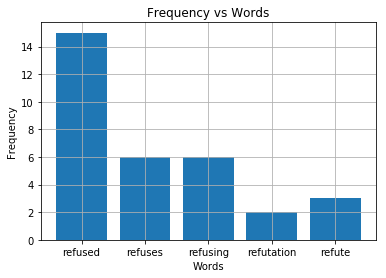

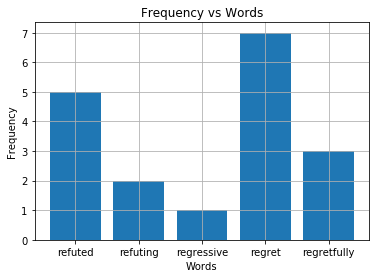

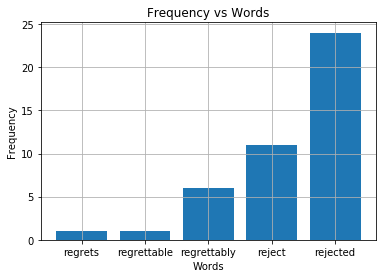

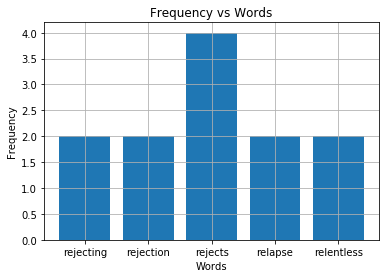

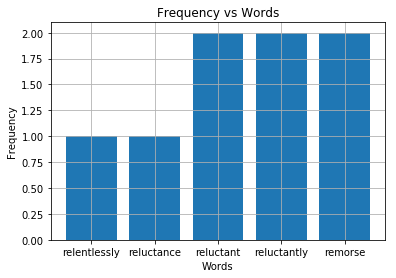

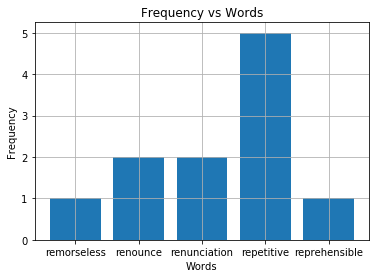

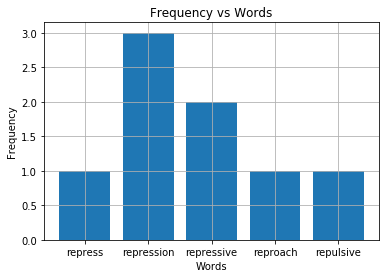

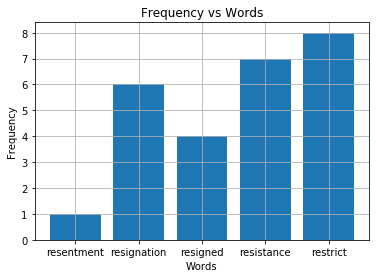

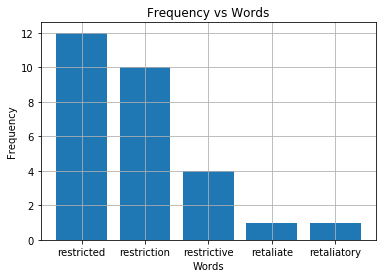

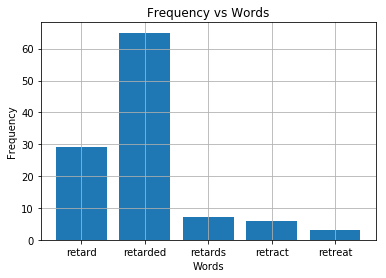

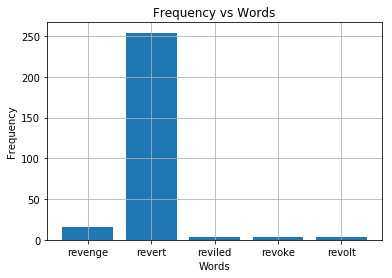

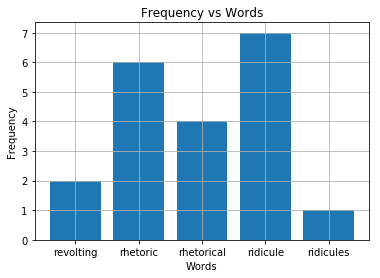

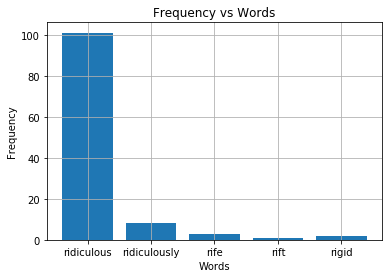

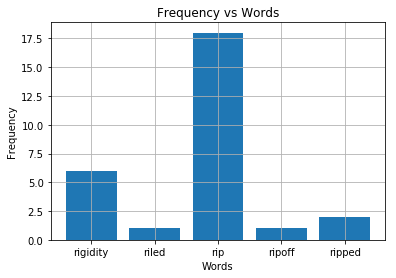

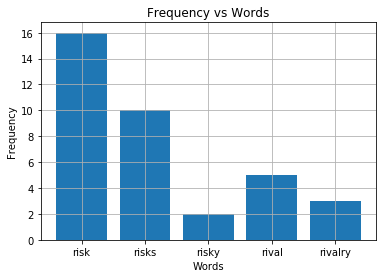

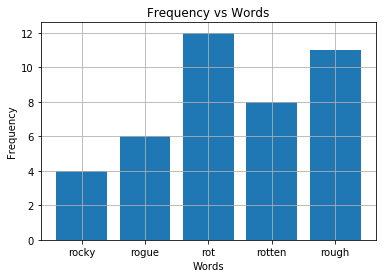

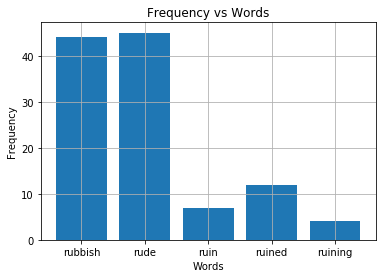

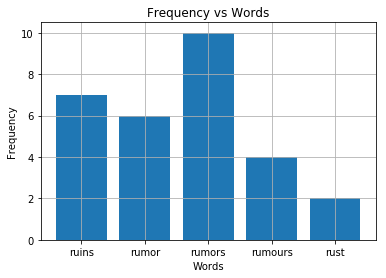

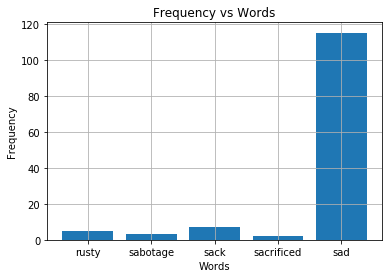

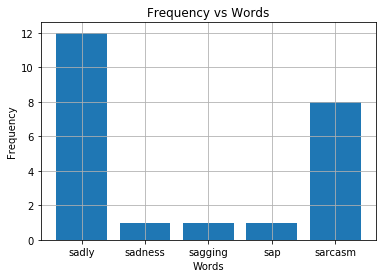

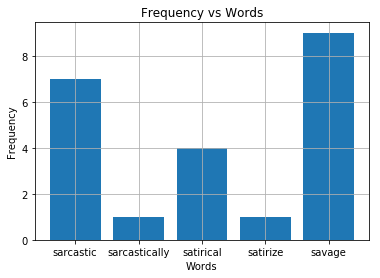

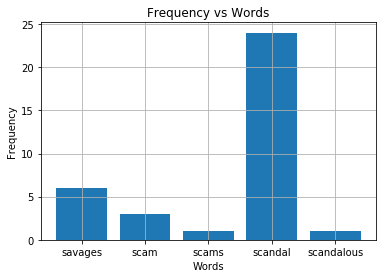

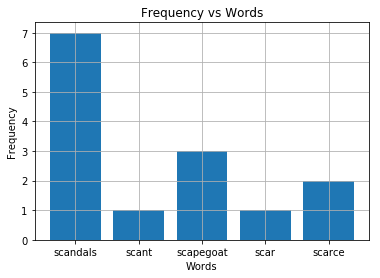

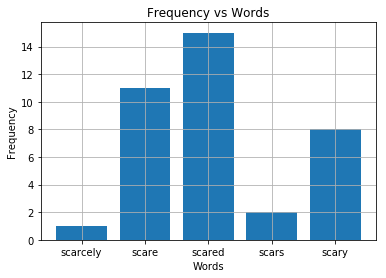

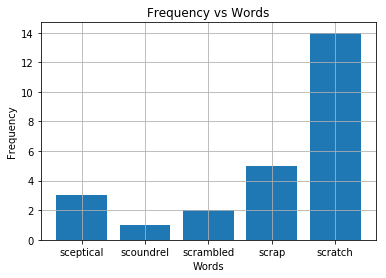

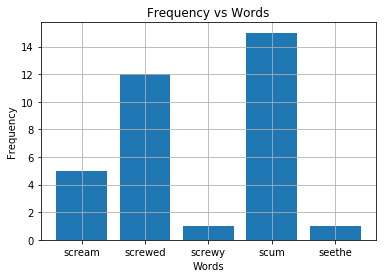

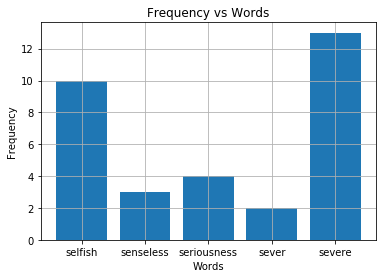

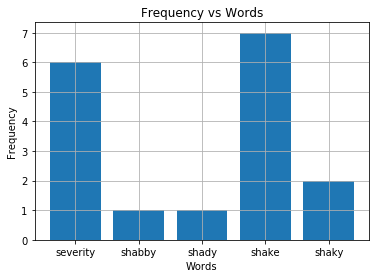

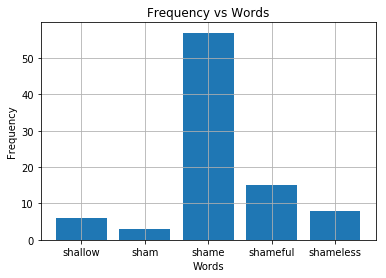

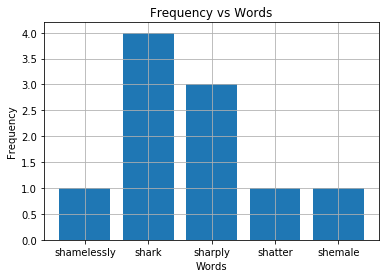

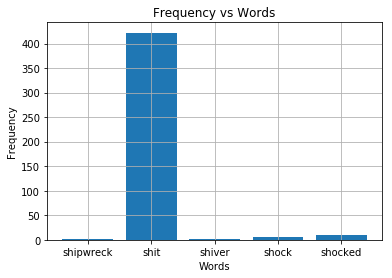

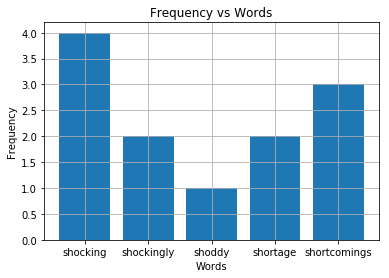

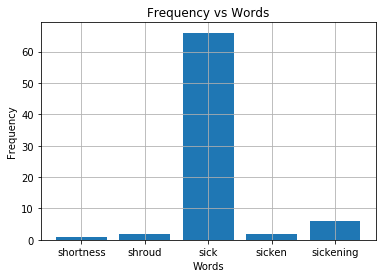

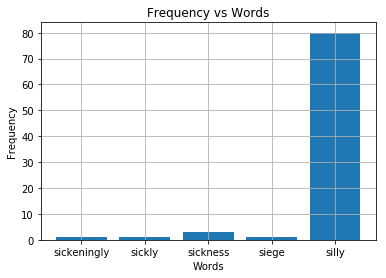

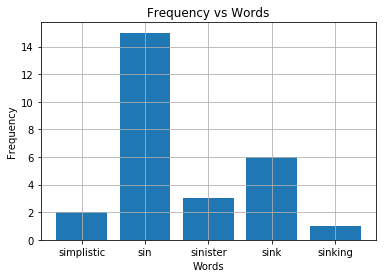

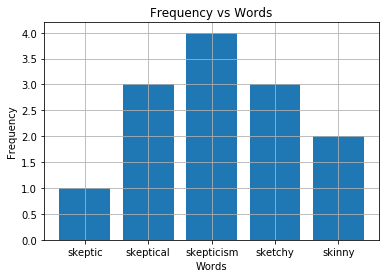

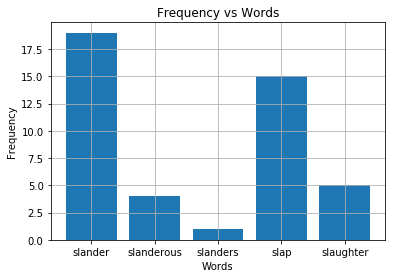

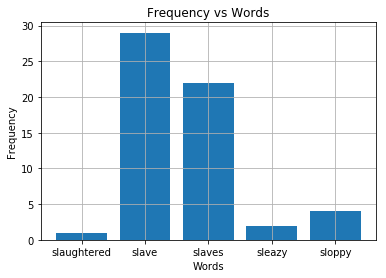

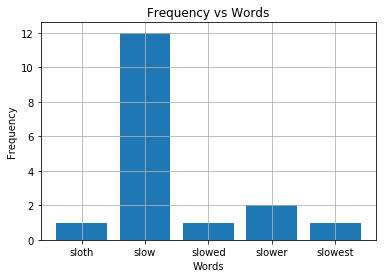

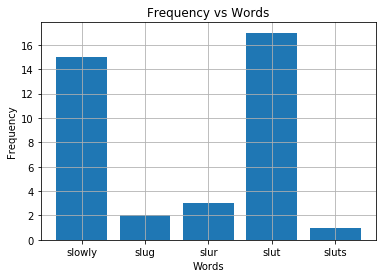

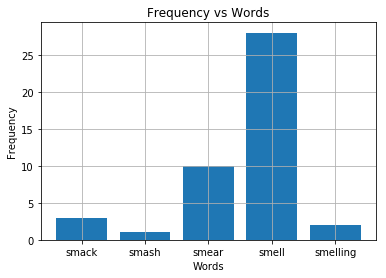

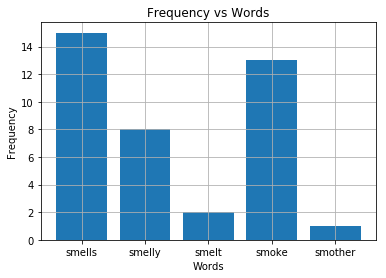

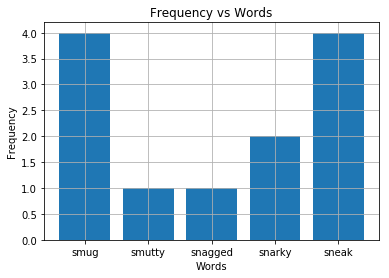

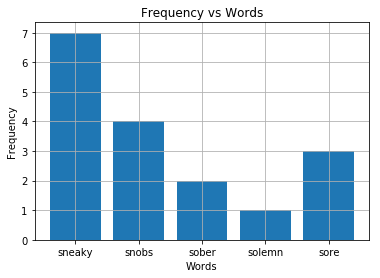

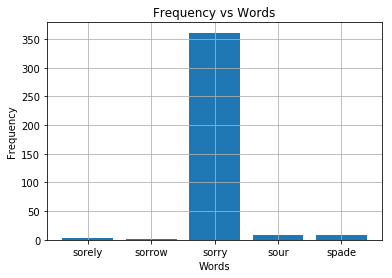

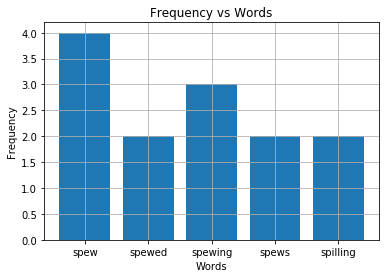

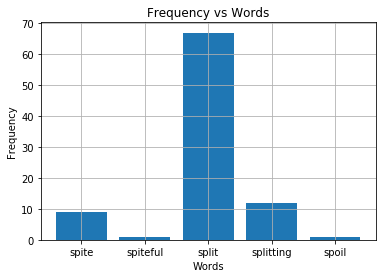

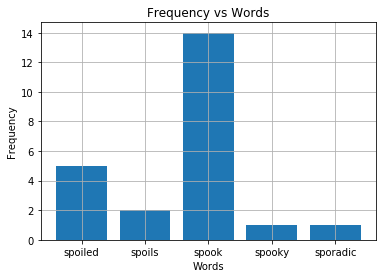

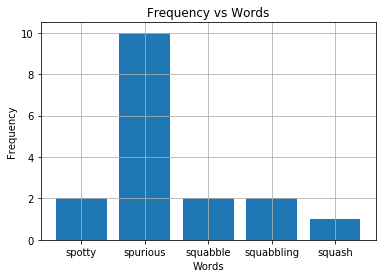

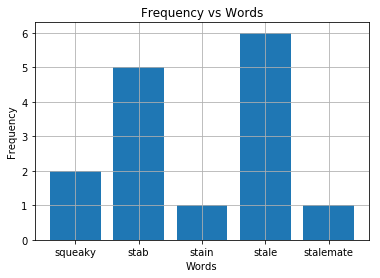

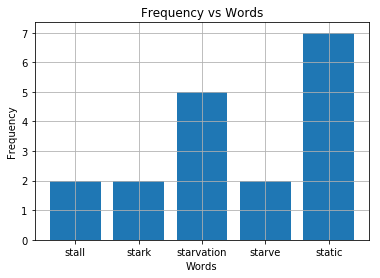

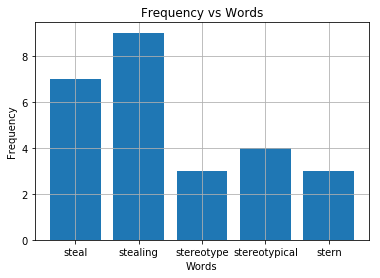

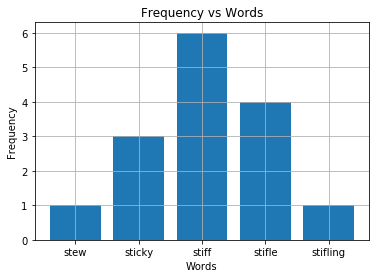

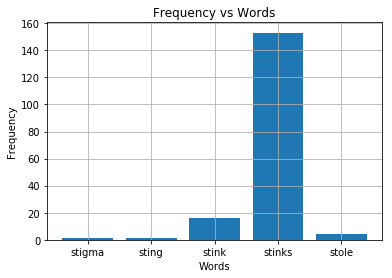

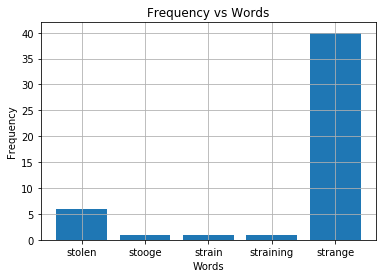

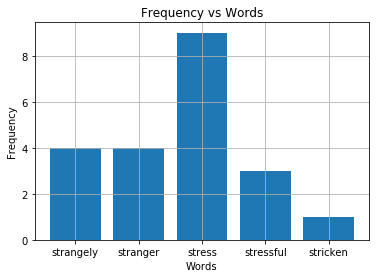

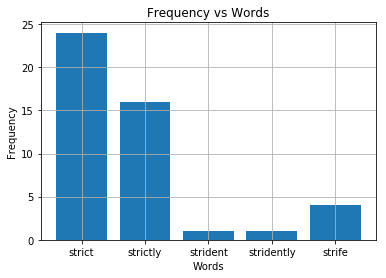

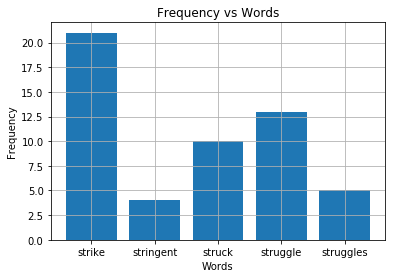

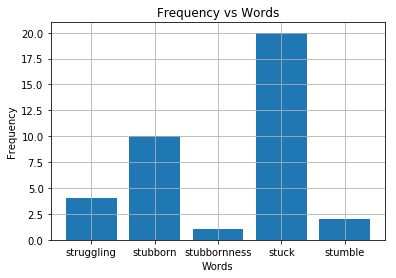

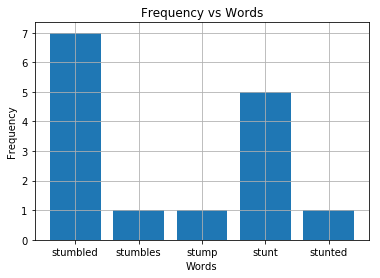

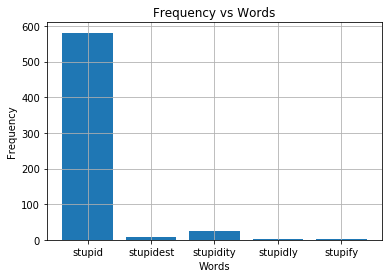

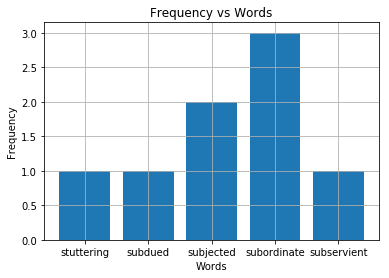

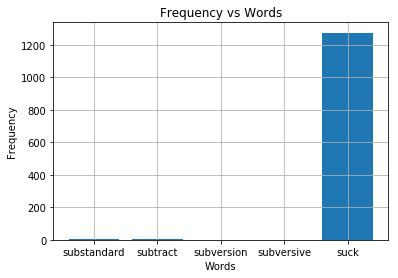

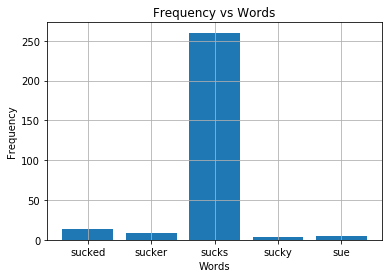

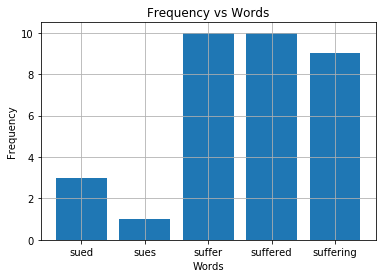

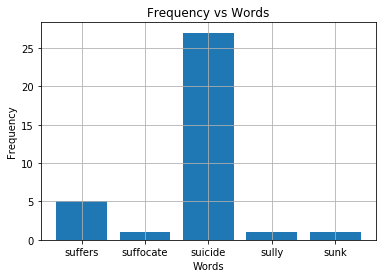

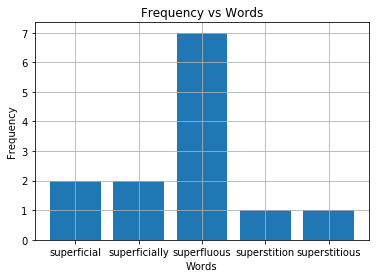

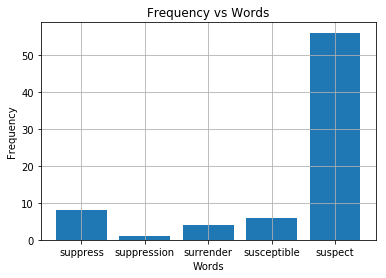

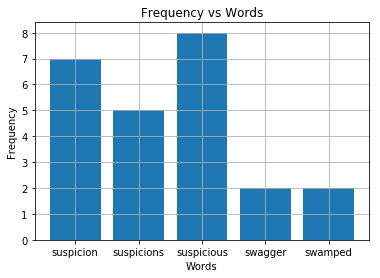

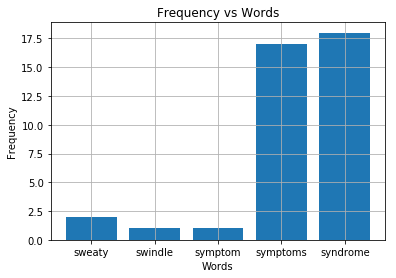

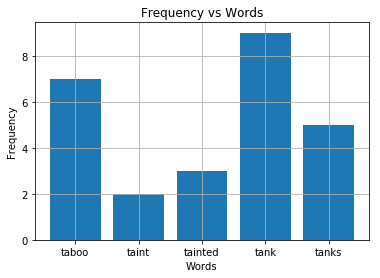

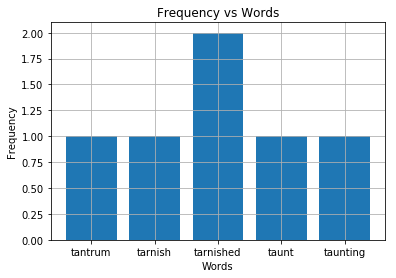

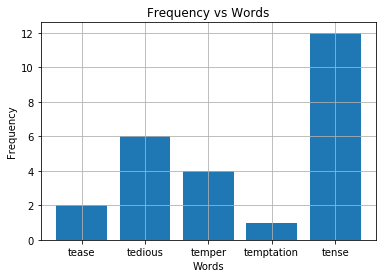

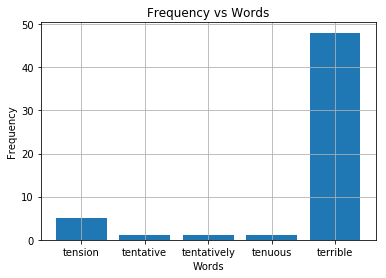

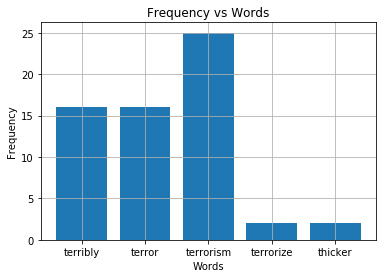

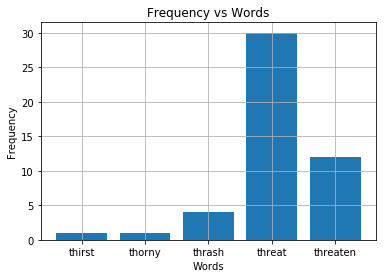

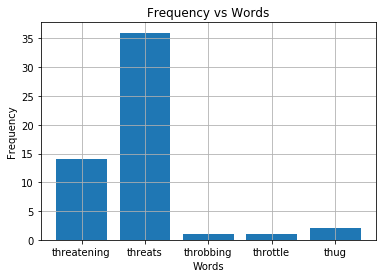

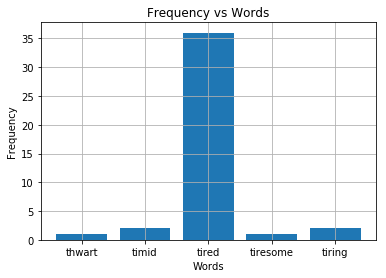

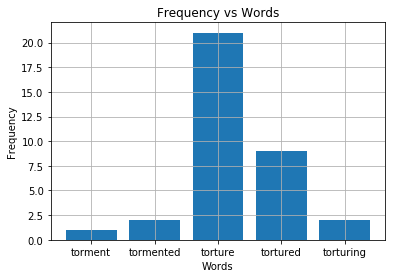

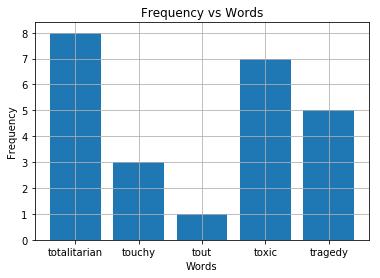

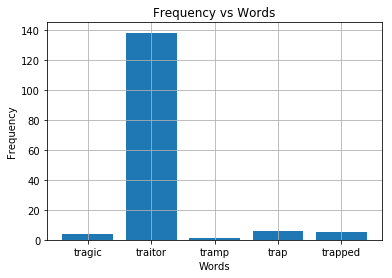

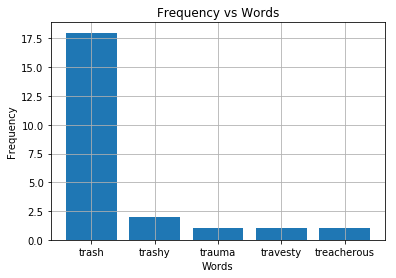

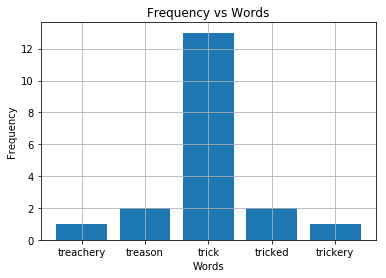

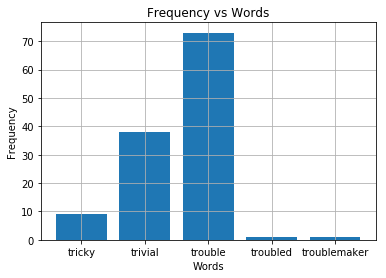

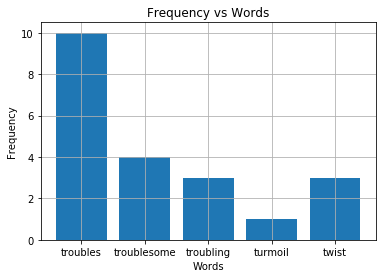

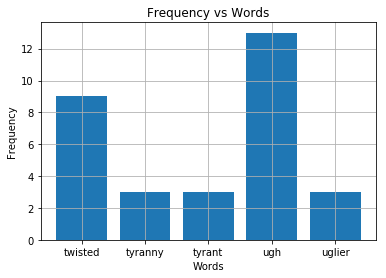

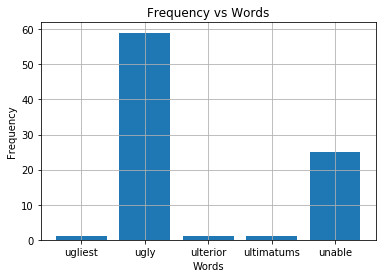

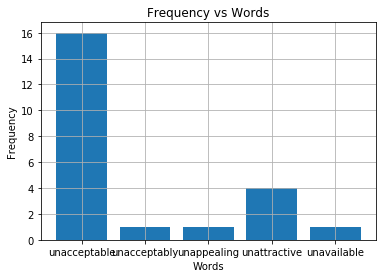

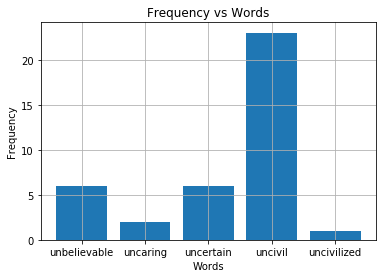

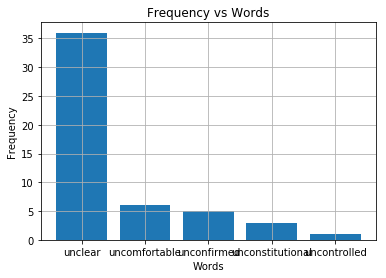

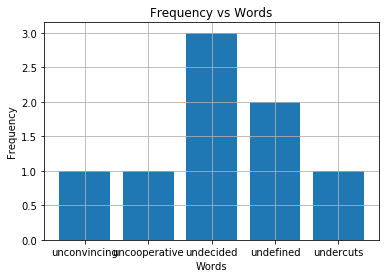

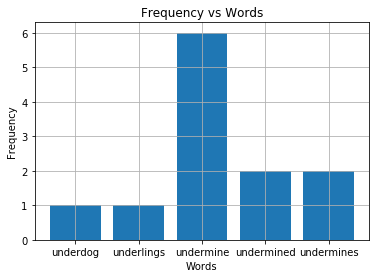

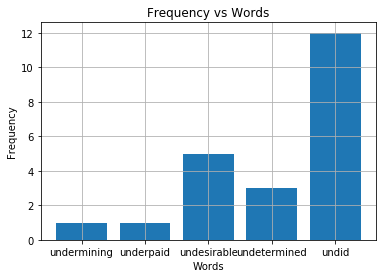

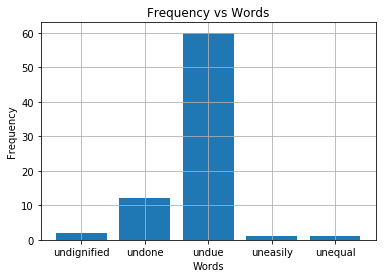

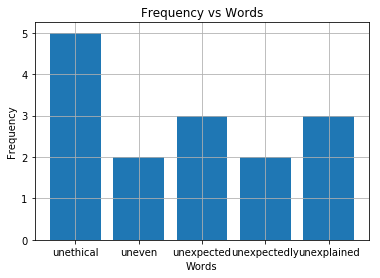

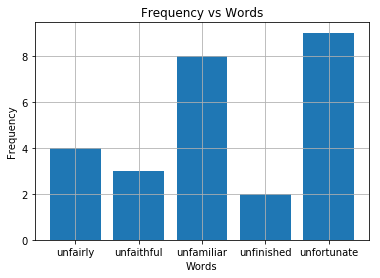

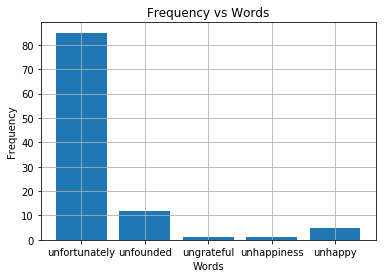

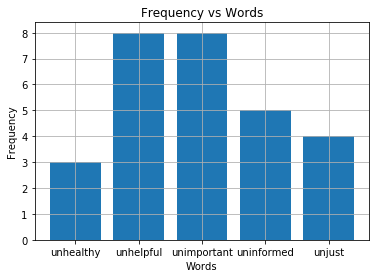

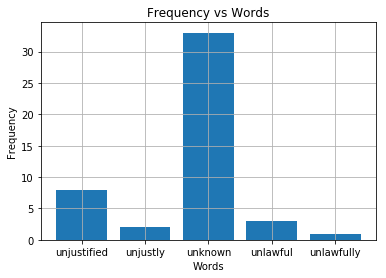

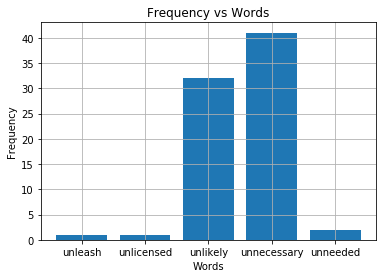

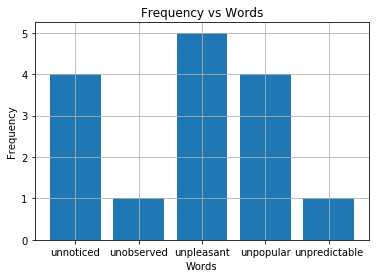

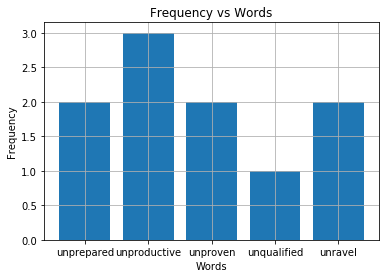

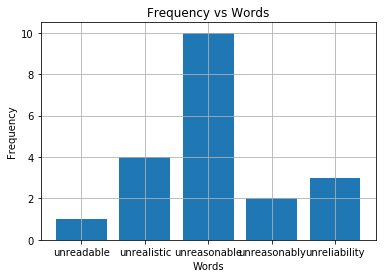

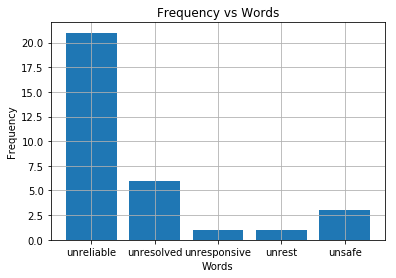

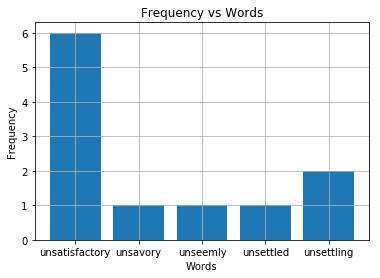

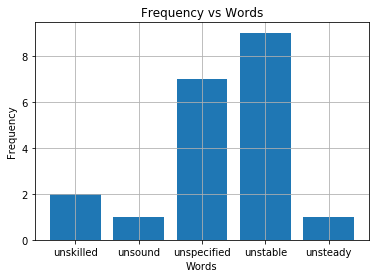

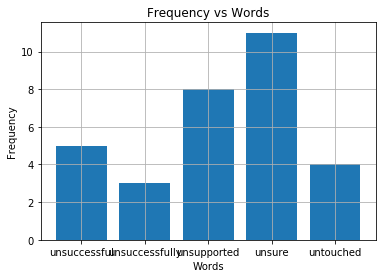

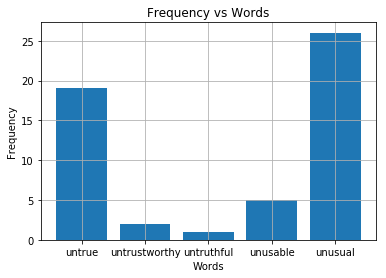

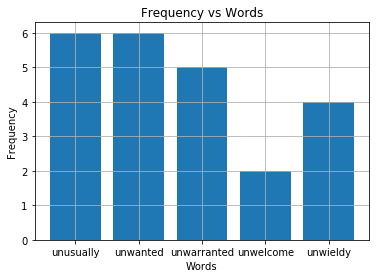

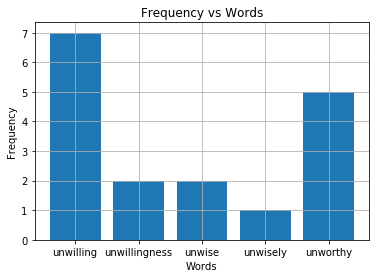

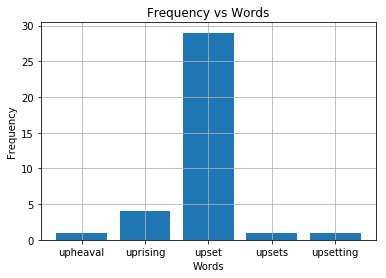

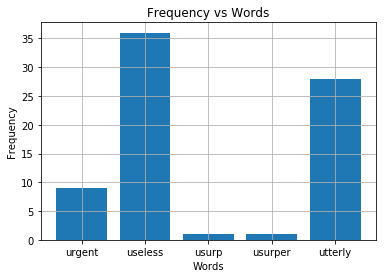

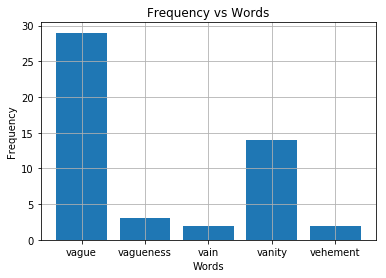

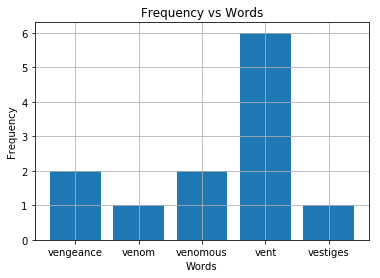

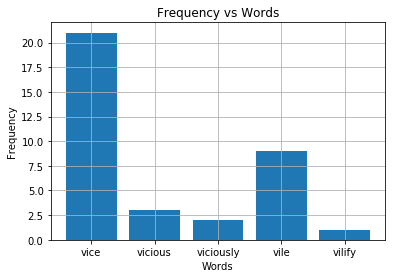

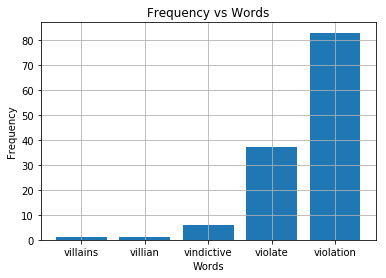

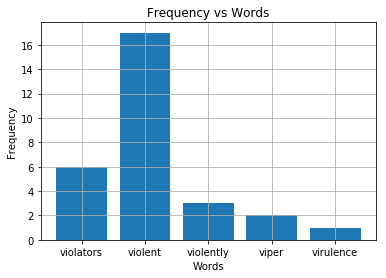

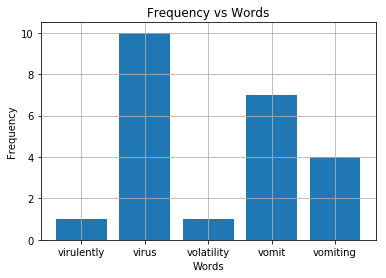

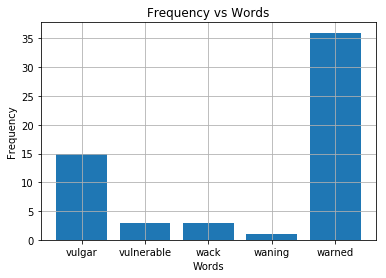

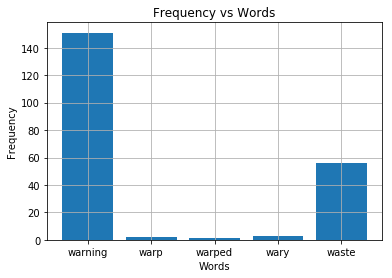

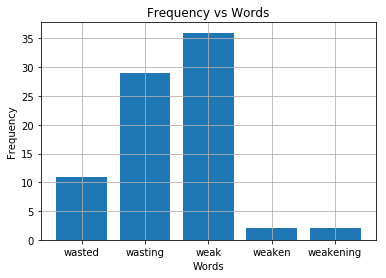

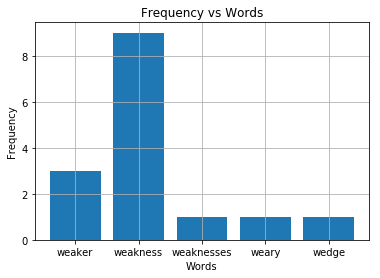

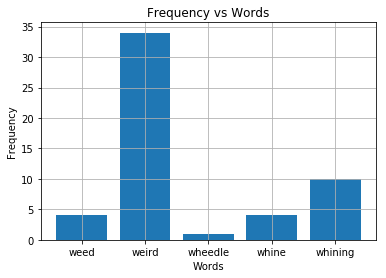

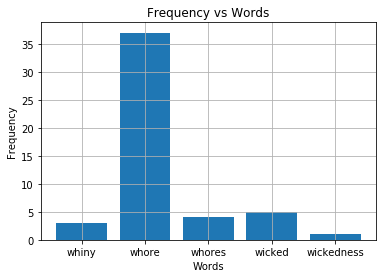

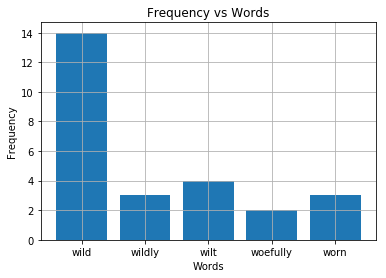

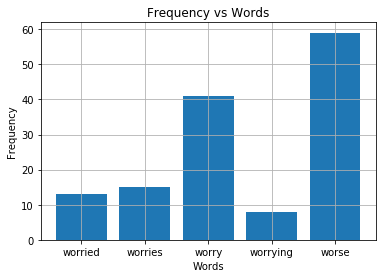

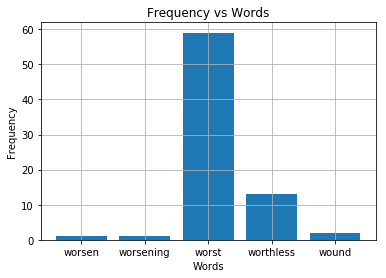

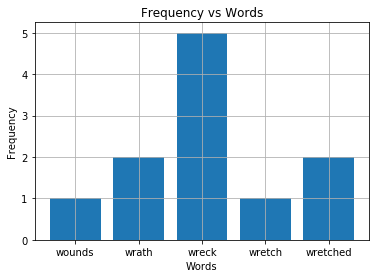

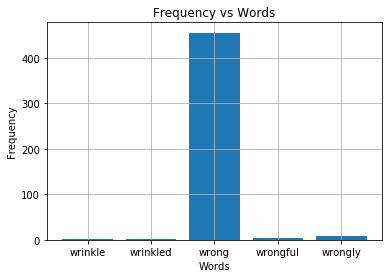

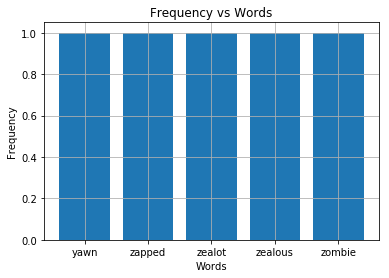

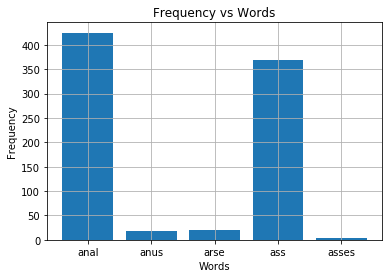

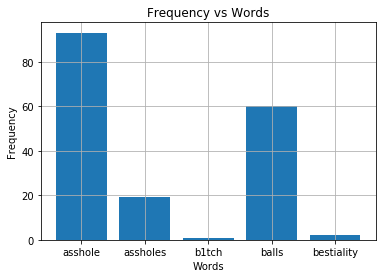

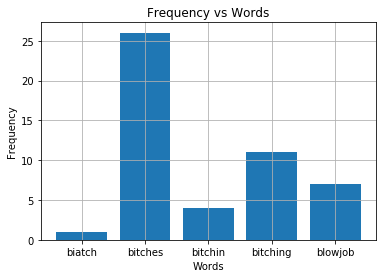

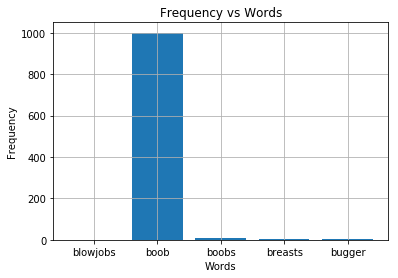

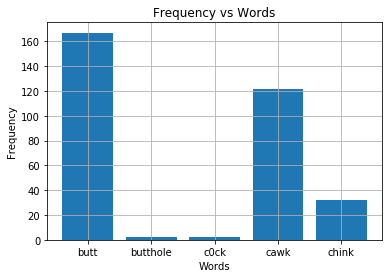

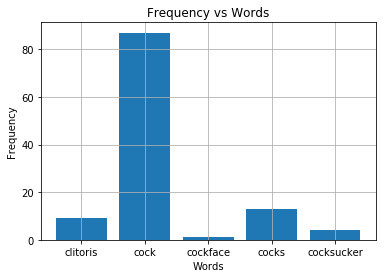

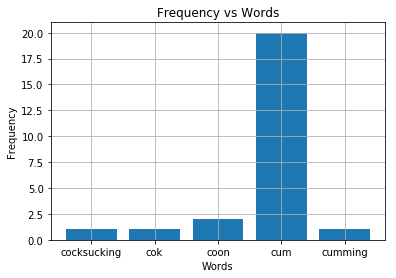

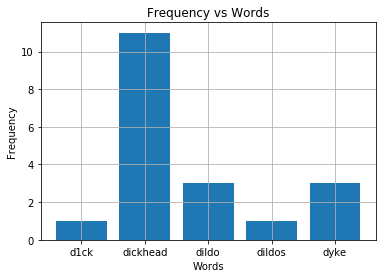

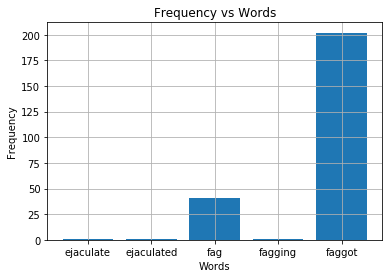

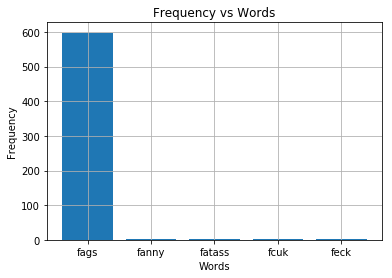

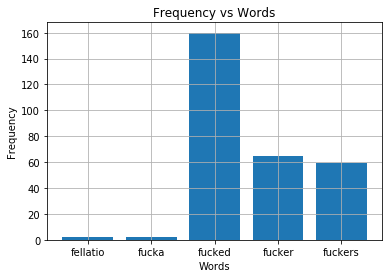

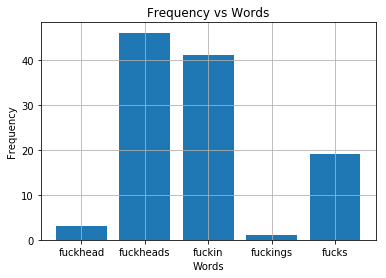

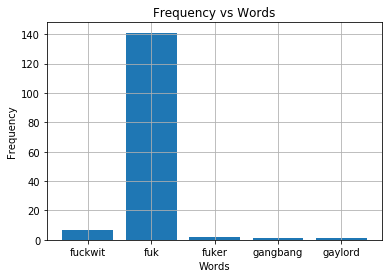

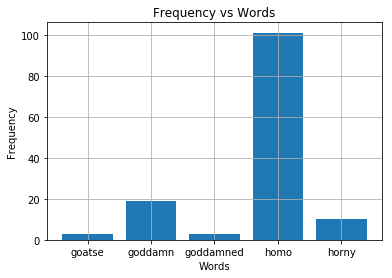

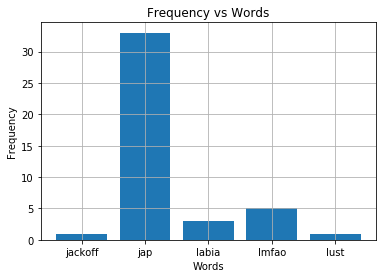

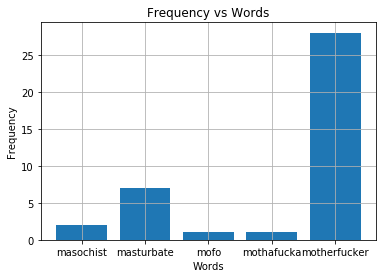

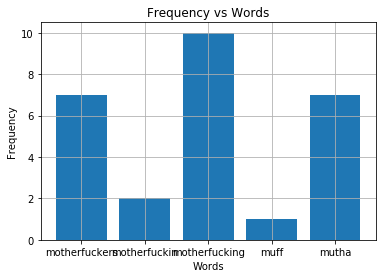

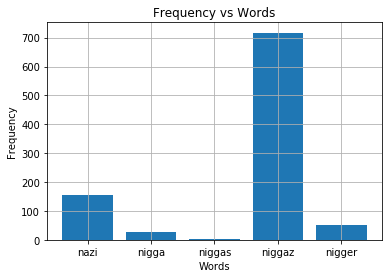

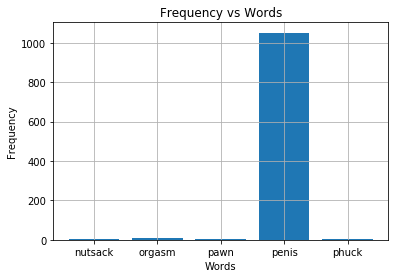

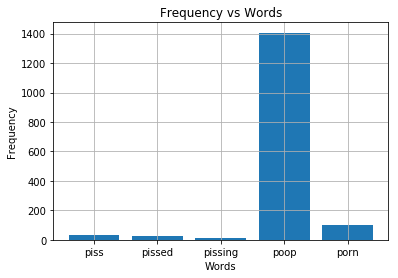

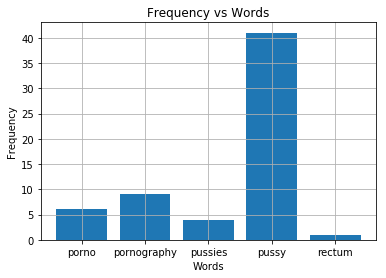

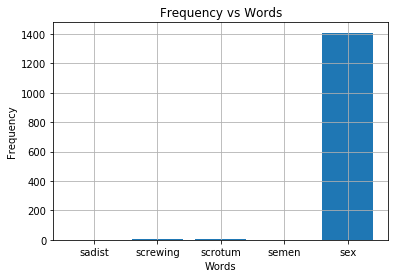

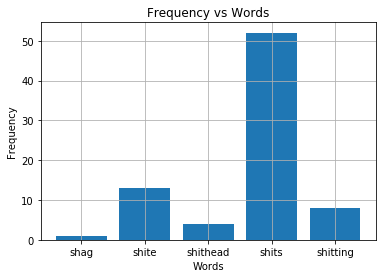

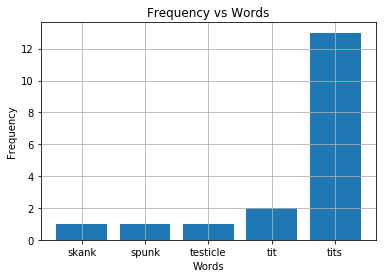

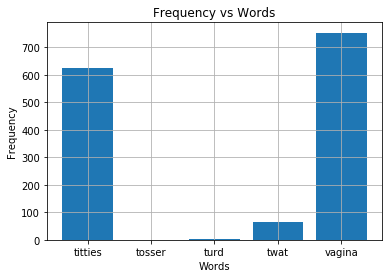

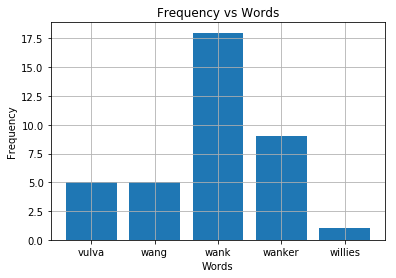

In [8]:
#plt.plot(bad_words[:5], sums[:5], ".")
start = 0
for i in range(1, len(words_not_zero)):
    if i % 5 == 0:
        plt.figure()
        plt.bar(words_not_zero[start:i], sums_not_zero[start:i])
        plt.xlabel("Word")
        plt.ylabel("Frequency")
        plt.title("Frequency vs Word")
        plt.grid()
        start = i

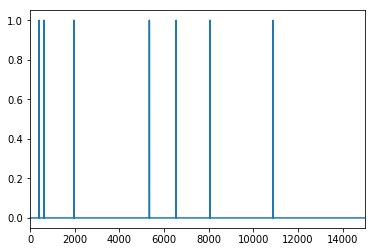

In [9]:
df_test_unsupervised[['willy']].sum(axis=1).plot()